In [27]:

# monitor training performance
from numpy import loadtxt
from numpy import genfromtxt
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [28]:
from matplotlib import pyplot

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [30]:
import sklearn.metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [31]:
from xgboost import plot_importance

import tensorflow as tf

In [26]:
from scipy.stats import sem

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# 定義計算信賴區間的函式
def CI(y_pred, y_prob, threshold, score_type):
    n_bootstraps = 1000
    rng_seed = 42  # 控制重現性
    bootstrapped_scores = []
    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_pred[indices])) < 2:
            continue
        if score_type == 'acc':
            score = accuracy_score(y_pred[indices], y_prob[indices] > threshold)
        elif score_type == 'auc':
            score = roc_auc_score(y_pred[indices], y_prob[indices])
        bootstrapped_scores.append(score)
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    return confidence_lower, confidence_upper

In [32]:
def score(m, x_train, y_train, x_val, y_val, train=True):
    if train:
        pred=m.predict(x_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(x_val)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_val, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_val, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_val, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_val, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_val, pred)}")

In [33]:
dataset = pd.read_csv(r"..\NEW_DRUGS.csv")

dataset = dataset.drop(['cathinone'],axis=1)
dataset = dataset.drop(['k1'],axis=1)
dataset = dataset.drop(['ketamineclass'],axis=1)
dataset = dataset.drop(['phenethylamines'],axis=1)
dataset = dataset.drop(['tryptamines'],axis=1)
dataset = dataset.drop(['piperazine'],axis=1)
dataset = dataset.drop(['bzd'],axis=1)
dataset = dataset.drop(['typeopium'],axis=1)
dataset = dataset.drop(['traditiondrugabuse'],axis=1)

Y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values

X_trainval, X_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.2, random_state=44, stratify=Y,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=44, stratify=y_trainval,shuffle=True)

SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

smote = SMOTE(random_state=2022,sampling_strategy=0.3)
X_train_smote, y_train_smote = smote.fit_resample(X_trainval, y_trainval)

print(pd.Series(y_train_smote).value_counts())

0    864
1    259
dtype: int64


In [10]:
dataset.columns[1:] # 數據位移

Index(['age', 'male', 'asc_lable', 'asc', 'actionstrange',
       'suspected_use_drug', 'sympathomimetic_drug', 'bt', 'hr', 'rr', 'sbp',
       'dbp', 'spo2', 'violence', 'self_injury', 'palpitation', 'chest_pain',
       'dyspnea', 'nausea_vomiting', 'hallucination', 'agitation_delirium',
       'seizure', 'tremor', 'coma', 'gcs_total', 'pupil_left', 'pupil_right',
       'pupilsize_label_left', 'pupilsize_label_right', 'beathing_sound',
       'bowel_sound', 'urine_incontinence', 'facial_flush', 'sweating',
       'myoclonusrigidity', 'congestive_heart_failure', 'copd', 'esrd',
       'liver_cirrhosis', 'immunocompromised', 'brainct', 'wbc', 'hct',
       'platelet', 'creatinine', 'na', 'k', 'sugar', 'cpk', 'cpk1', 'alt',
       'lactate_mmol', 'lactate(mmol/L)', 'troponin_i', 'ethyl_alcohol', 'ph',
       'pco2', 'hco3', 'amphetamine', 'morphine', 'ketamine', 'mdma',
       'benzodiazepine', 'cannabinoids', 'nps'],
      dtype='object')

In [ ]:
print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'param_subsample', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


XGB_SMOTE

最佳AUC: 0.8164403665651065，最佳參數組合：{'booster': 'dart', 'eta': 0.1, 'gamma': 5, 'learning_rate': 0.1, 'max_delta_step': 0.8, 'max_depth': 6, 'min_child_weight': 6, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.3, 'sample_type': 'uniform', 'skip_drop': 0.5, 'subsample': 0.8}
訓練集平均AUC: 0.928782606762115, 標準差: 0.007650194566876871, 驗證集平均AUC: 0.8164403665651065, 標準差: 0.06856674474799268, 參數組合: {'booster': 'dart', 'eta': 0.1, 'gamma': 5, 'learning_rate': 0.1, 'max_delta_step': 0.8, 'max_depth': 6, 'min_child_weight': 6, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.3, 'sample_type': 'uniform', 'skip_drop': 0.5, 'subsample': 0.8}
[0]	validation_0-auc:0.72278
[1]	validation_0-auc:0.72278
[2]	validation_0-auc:0.72278
[3]	validation_0-auc:0.72278
[4]	validation_0-auc:0.72544
[5]	validation_0-auc:0.72544
[6]	validation_0-auc:0.72695
[7]	validation_0-auc:0.75071
[8]	validation_0-auc:0.79412
[9]	validation_0-auc:0.80859
[10]	validation_0-auc:0.822

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[29]	validation_0-auc:0.88944
[30]	validation_0-auc:0.88957
[31]	validation_0-auc:0.88947
[32]	validation_0-auc:0.88948
[33]	validation_0-auc:0.88966
[34]	validation_0-auc:0.89024
[35]	validation_0-auc:0.89025
[36]	validation_0-auc:0.89374
[37]	validation_0-auc:0.89455
[38]	validation_0-auc:0.89450
[39]	validation_0-auc:0.89460
[40]	validation_0-auc:0.89892
[41]	validation_0-auc:0.89891
[42]	validation_0-auc:0.89897
[43]	validation_0-auc:0.90044
[44]	validation_0-auc:0.90238
[45]	validation_0-auc:0.90473
[46]	validation_0-auc:0.90489
[47]	validation_0-auc:0.90680
[48]	validation_0-auc:0.90856
[49]	validation_0-auc:0.90863
[50]	validation_0-auc:0.91089
[51]	validation_0-auc:0.91090
[52]	validation_0-auc:0.91086
[53]	validation_0-auc:0.91093
[54]	validation_0-auc:0.91107
[55]	validation_0-auc:0.91130
[56]	validation_0-auc:0.91315
[57]	validation_0-auc:0.91450
[58]	validation_0-auc:0.91449
[59]	validation_0-auc:0.91507
[60]	validation_0-auc:0.91683
[61]	validation_0-auc:0.91685
[62]	valid

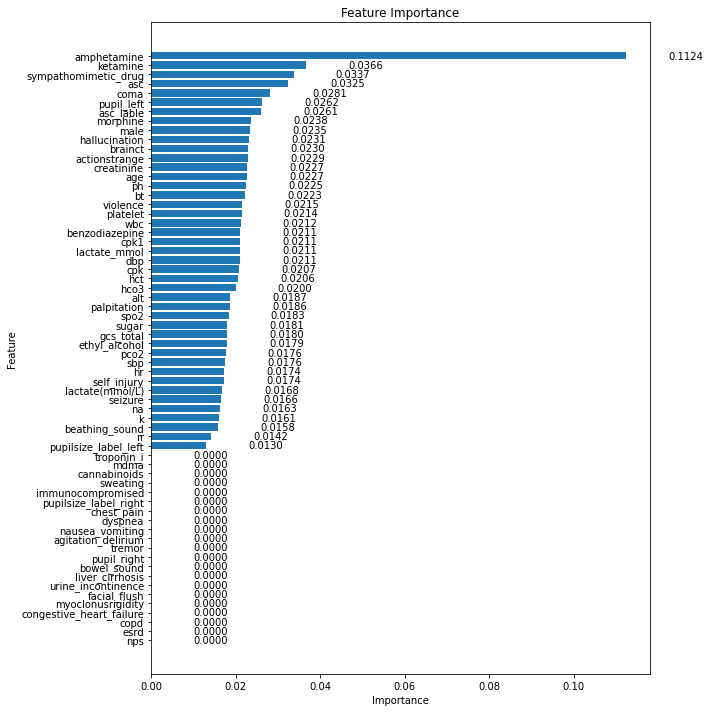

In [62]:
params = {'booster': ['dart'], 'eta': [0.1], 'gamma': [5], 'learning_rate': [0.1], 'max_delta_step': [0.8], 'max_depth': [6], 'min_child_weight': [6], 'normalize_type': ['tree'], 'objective': ['binary:logistic'], 'rate_drop': [0.3], 'sample_type': ['uniform'], 'skip_drop': [0.5], 'subsample': [0.8]}


xg =  XGBClassifier()
grid = GridSearchCV(xg, params, cv=5,verbose=False,scoring = 'roc_auc',return_train_score=True,n_jobs=2)

# 最佳AUC: 0.8340613206619469，最佳參數組合：{'booster': 'dart', 'eta': 0.1, 'gamma': 5, 'learning_rate': 0.1, 'max_delta_step': 0.8, 'max_depth': 6, 'min_child_weight': 6, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.3, 'sample_type': 'uniform', 'skip_drop': 0.5, 'subsample': 0.8}
grid.fit(X_train_smote, y_train_smote)
best_params = grid.best_params_

# 評估，打分數
print(f"最佳AUC: {grid.best_score_}，最佳參數組合：{grid.best_params_}")

# 取得 cross validation 的平均準確率及標準差
means_train = grid.cv_results_['mean_train_score']
stds_train = grid.cv_results_['std_train_score']
means_val = grid.cv_results_['mean_test_score']
stds_val = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")


model = XGBClassifier(**best_params)


eval_set = [(X_train_smote, y_train_smote)]

model.fit(X_train_smote, y_train_smote, eval_metric='auc', eval_set=eval_set, verbose=True) #auc

y_pred = model.predict(X_val)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_val, predictions)

# 轉換X為DataFrame物件
l = pd.DataFrame(X, columns=dataset.columns[1:])

# 取得特徵重要性
importance = model.feature_importances_

# 建立特徵重要性的資料框
feature_importances = pd.DataFrame({'Feature': l.columns, 'Importance': importance})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

# 設定圖表大小
plt.figure(figsize=(10, 10))

# 繪製特徵重要性長條圖
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# 反轉Y軸，讓重要性高的項目顯示在上方
plt.gca().invert_yaxis()

# 顯示特徵重要性數值
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', color='black', va='center')

# 調整Y軸刻度標籤
plt.yticks(range(len(feature_importances['Feature'])), feature_importances['Feature'])

plt.tight_layout()
plt.show()

y_pred_proba_train = model.predict_proba(X_train_smote)

fpr_train, tpr_train, _ = sklearn.metrics.roc_curve(y_train_smote, y_pred_proba_train[:, 1])
y_pred_proba_test = model.predict_proba(X_test)

auc_train = sklearn.metrics.auc(fpr_train, tpr_train)
fpr_test_final, tpr_test_final, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_test[:, 1])


# 使用模型進行預測
y_pred = model.predict(X_test)

auc_test_final = sklearn.metrics.auc(fpr_test_final, tpr_test_final)


xgb_auc = fpr_test_final,tpr_test_final,auc_test_final,f1_score(y_test, y_pred)*100 #組合用


In [19]:
best_params
# 評估，打分數
print(f"最佳AUC: {grid.best_score_}，最佳參數組合：{grid.best_params_}")

最佳AUC: 0.8340613206619469，最佳參數組合：{'booster': 'dart', 'eta': 0.1, 'gamma': 5, 'learning_rate': 0.1, 'max_delta_step': 0.8, 'max_depth': 6, 'min_child_weight': 6, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.3, 'sample_type': 'uniform', 'skip_drop': 0.5, 'subsample': 0.8}


In [87]:
from sklearn.metrics import roc_auc_score
from math import sqrt
def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

In [101]:
from sklearn.metrics import roc_auc_score, accuracy_score
from math import sqrt

def calculate_ci(y_true, y_score,auc, score_type='auc'):
    if score_type == 'auc':
        # score = roc_auc_score(y_true, y_score)
        score = auc
        n_positive = sum(y_true == 1)
        n_negative = sum(y_true == 0)
    elif score_type == 'accuracy':
        score = accuracy_score(y_true, y_score)
        n_samples = len(y_true)
        n_positive = sum(y_true == 1)
        n_negative = sum(y_true == 0)
    else:
        raise ValueError("Invalid score type. Available options: 'auc' or 'accuracy'.")

    q1 = score / (2 - score)
    q2 = 2 * score**2 / (1 + score)
    se_score = sqrt((score * (1 - score) + (n_positive - 1) * (q1 - score**2) + (n_negative - 1) * (q2 - score**2)) / (n_positive * n_negative))

    if score_type == 'auc':
        lower = score - 1.96 * se_score
        upper = score + 1.96 * se_score
    elif score_type == 'accuracy':
        lower = score - 1.96 * se_score
        upper = score + 1.96 * se_score

    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1

    return (lower, upper,(1.96 * se_score))

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Accuracy: 0.84


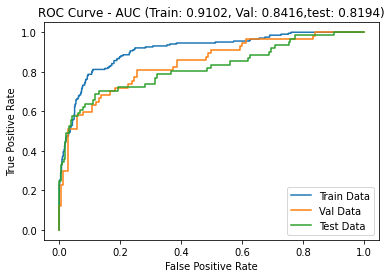

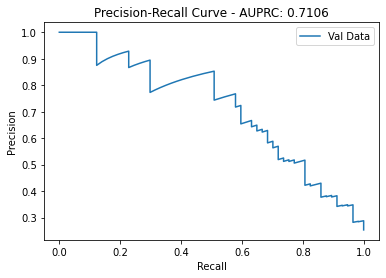

Val Result:

Accuracy Score: 84.00%
Precision Score: 83.87%
Recall Score: 45.61%
F1 score: 59.09%
Confusion Matrix:
[[163   5]
 [ 31  26]]
AUPRC: 0.7106
AUC Confidence Interval: (0.7776, 0.9013)
ACC Confidence Interval: (0.7911, 0.8844)
test Result:

Accuracy Score: 85.20%
Precision Score: 85.71%
Recall Score: 39.34%
F1 score: 53.93%
Confusion Matrix:
[[212   4]
 [ 37  24]]
AUC Confidence Interval: (0.7468, 0.8857)
ACC Confidence Interval: (0.8123, 0.8917)
(0.6306596082702908, 0.7957188378449976)
(0.7723170557902511, 0.9076829442097488, 0.06768294420974887)
(0.7741676449252795, 0.9089986040304432, 0.06741547955258193)
(0.7890743813156261, 0.9148967378179479, 0.06291117825116088)
(0.7514158926370126, 0.8873212051164786, 0.06795265623973303)


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Accuracy: 0.8488888888888889


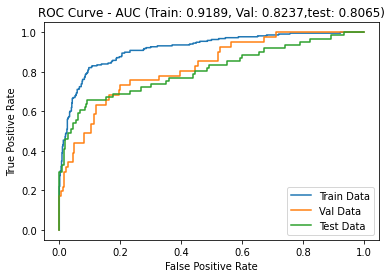

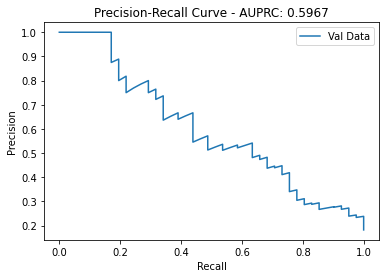

Val Result:

Accuracy Score: 84.89%
Precision Score: 64.00%
Recall Score: 39.02%
F1 score: 48.48%
Confusion Matrix:
[[175   9]
 [ 25  16]]
AUPRC: 0.5967
AUC Confidence Interval: (0.7496, 0.8899)
ACC Confidence Interval: (0.8000, 0.8889)
test Result:

Accuracy Score: 85.56%
Precision Score: 88.89%
Recall Score: 39.34%
F1 score: 54.55%
Confusion Matrix:
[[213   3]
 [ 37  24]]
AUC Confidence Interval: (0.7313, 0.8788)
ACC Confidence Interval: (0.8159, 0.8953)
(0.5732500607089752, 0.7680807982517881)
(0.7720985064122627, 0.9256792713655151, 0.07679038247662621)
(0.7422794208178091, 0.9051224879838876, 0.08142153358303923)
(0.7933072855166498, 0.9178840502234223, 0.062288382353386296)
(0.7368664402213232, 0.8762179556499579, 0.06967575771431733)


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Accuracy: 0.8088888888888889


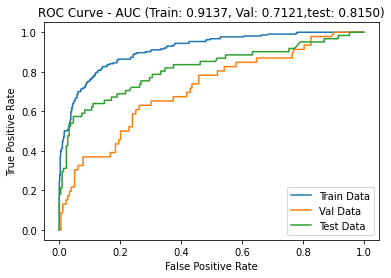

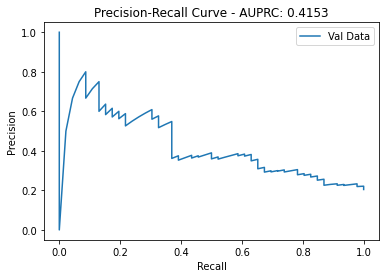

Val Result:

Accuracy Score: 80.89%
Precision Score: 55.56%
Recall Score: 32.61%
F1 score: 41.10%
Confusion Matrix:
[[167  12]
 [ 31  15]]
AUPRC: 0.4153
AUC Confidence Interval: (0.6213, 0.7977)
ACC Confidence Interval: (0.7556, 0.8578)
test Result:

Accuracy Score: 86.28%
Precision Score: 82.86%
Recall Score: 47.54%
F1 score: 60.42%
Confusion Matrix:
[[210   6]
 [ 32  29]]
AUC Confidence Interval: (0.7435, 0.8873)
ACC Confidence Interval: (0.8195, 0.9025)
(0.5351049649446309, 0.7239428854318568)
(0.7293045086294868, 0.888473269148291, 0.0795843802594021)
(0.6218915864498405, 0.8023250761685708, 0.09021674485936519)
(0.8018161704725375, 0.9238155984805312, 0.06099971400399685)
(0.7464072942913483, 0.8835259176090765, 0.06855931165886413)


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Accuracy: 0.84375


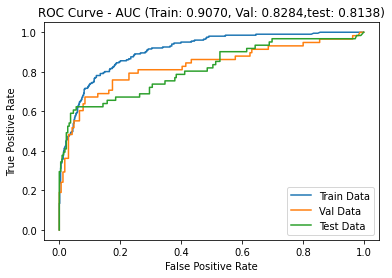

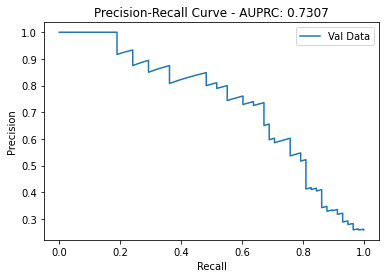

Val Result:

Accuracy Score: 84.38%
Precision Score: 84.85%
Recall Score: 48.28%
F1 score: 61.54%
Confusion Matrix:
[[161   5]
 [ 30  28]]
AUPRC: 0.7307
AUC Confidence Interval: (0.7548, 0.8954)
ACC Confidence Interval: (0.7946, 0.8884)
test Result:

Accuracy Score: 85.20%
Precision Score: 83.33%
Recall Score: 40.98%
F1 score: 54.95%
Confusion Matrix:
[[211   5]
 [ 36  25]]
AUC Confidence Interval: (0.7421, 0.8821)
ACC Confidence Interval: (0.8123, 0.8917)
(0.6453452432394341, 0.8072928955225102)
(0.7771936026429218, 0.9103063973570782, 0.06655639735707818)
(0.7592913167511, 0.8974390530037815, 0.0690738681263407)
(0.7890743813156261, 0.9148967378179479, 0.06291117825116088)
(0.7450715325620125, 0.8825089167397482, 0.06871869208886784)


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Accuracy: 0.8705357142857143


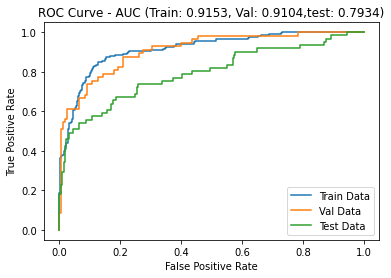

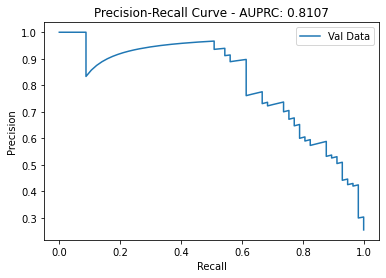

Val Result:

Accuracy Score: 87.05%
Precision Score: 91.18%
Recall Score: 54.39%
F1 score: 68.13%
Confusion Matrix:
[[164   3]
 [ 26  31]]
AUPRC: 0.8107
AUC Confidence Interval: (0.8654, 0.9499)
ACC Confidence Interval: (0.8259, 0.9107)
test Result:

Accuracy Score: 85.56%
Precision Score: 86.21%
Recall Score: 40.98%
F1 score: 55.56%
Confusion Matrix:
[[212   4]
 [ 36  25]]
AUC Confidence Interval: (0.7146, 0.8664)
ACC Confidence Interval: (0.8159, 0.8953)
(0.6848467814483308, 0.8410487958181887)
(0.8084767375890254, 0.9325946909824032, 0.06205897669668894)
(0.8575785570550374, 0.9632009365892529, 0.0528111897671078)
(0.7933072855166498, 0.9178840502234223, 0.062288382353386296)
(0.7221079224398509, 0.8647166070076292, 0.07130434228388917)


In [102]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
count = 0
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建XGBoost分類器
    xgb_model = XGBClassifier(**best_params, random_state=42)
    eval_set = [(x_test, y_test_cv)]

    # 訓練模型
    xgb_model.fit(x_train, y_train,early_stopping_rounds=5, eval_set=eval_set, verbose=False)
        
    # 在測試集上進行預測
    y_pred = xgb_model.predict(x_test)
    
    # 計算模型的準確率或其他評估指標
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線数据
    y_pred_proba_train = xgb_model.predict_proba(x_train)
    xgb_fpr_train, xgb_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    xgb_auc_train = sklearn.metrics.auc(xgb_fpr_train, xgb_tpr_train)

    y_pred_proba_test = xgb_model.predict_proba(x_test)
    xgb_fpr_test, xgb_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    xgb_auc_test = sklearn.metrics.auc(xgb_fpr_test, xgb_tpr_test)

    # 在測試集上進行預測
    y_pred_last = xgb_model.predict(X_test)

    y_pred_proba_last_test = xgb_model.predict_proba(X_test)
    xgb_fpr_last_test, xgb_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    xgb_auc_last_test = sklearn.metrics.auc(xgb_fpr_last_test, xgb_tpr_last_test)
    

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

    # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    xgb_precision_last, xgb_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    xgb_auprc_last = sklearn.metrics.auc(xgb_recall_last, xgb_precision_last) 

    # 繪製ROC曲線
    plt.plot(xgb_fpr_train, xgb_tpr_train, label="Train Data")
    plt.plot(xgb_fpr_test, xgb_tpr_test, label="Val Data")
    plt.plot(xgb_fpr_last_test, xgb_tpr_last_test, label="Test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {xgb_auc_train:.4f}, Val: {xgb_auc_test:.4f},test: {xgb_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 計算並顯示AUC的信賴區間
    confidence_lower, confidence_upper = CI(y_test_cv, y_pred_proba_test[:, 1], 0.5, score_type='auc')
    print(f"AUC Confidence Interval: ({confidence_lower:.4f}, {confidence_upper:.4f})")

    # 計算並顯示ACC的信賴區間
    confidence_lower, confidence_upper = CI(y_test_cv, y_pred_proba_test[:, 1], 0.5, score_type='acc')
    print(f"ACC Confidence Interval: ({confidence_lower:.4f}, {confidence_upper:.4f})")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")

    # 計算並顯示AUC的信賴區間
    confidence_lower, confidence_upper = CI(y_test, y_pred_proba_last_test[:, 1], 0.5, score_type='auc')
    print(f"AUC Confidence Interval: ({confidence_lower:.4f}, {confidence_upper:.4f})")

    # 計算並顯示ACC的信賴區間
    confidence_lower, confidence_upper = CI(y_test, y_pred_proba_last_test[:, 1], 0.5, score_type='acc')
    print(f"ACC Confidence Interval: ({confidence_lower:.4f}, {confidence_upper:.4f})")


    # 計算信賴區間（95% 信賴水準）
    confidence_interval = roc_auc_ci(y_test_cv, y_pred,positive=1)
    print(confidence_interval)
    
    print(calculate_ci(y_test_cv, y_pred , xgb_auc_test,'accuracy'))
    print(calculate_ci(y_test_cv, y_pred , xgb_auc_test,'auc'))

    print(calculate_ci(y_test, y_pred_last , xgb_auc_last_test,'accuracy'))
    print(calculate_ci(y_test, y_pred_last , xgb_auc_last_test,'auc'))



In [26]:
best_index = np.argmax(grid.best_score_)  # 獲取最佳得分的索引
best_train_score = means_train[best_index]
best_val_score = means_val[best_index]

print("Best Model Train Score:", best_train_score)
print("Best Model Validation Score:", best_val_score)

Best Model Train Score: 0.8752961556138483
Best Model Validation Score: 0.8205222524293617


GBM_SMOTE

最佳AUC: 0.8207904202039839，最佳參數組合：{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 110, 'subsample': 0.7}
訓練集平均AUC: 0.9627540257185256, 標準差: 0.004506038593975327, 驗證集平均AUC: 0.8171712583613694, 標準差: 0.0625940321872738, 參數組合: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110, 'subsample': 0.7}
訓練集平均AUC: 0.9604267171550538, 標準差: 0.00463160043350357, 驗證集平均AUC: 0.8146767971254185, 標準差: 0.06900910871336882, 參數組合: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 110, 'subsample': 0.7}
訓練集平均AUC: 0.9587618226280947, 標準差: 0.007061360194996541, 驗證集平均AUC: 0.8147080822464137, 標準差: 0.06950483570766865, 參數組合: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 110, 'subsample': 0.7}
訓練集平均AUC: 0.

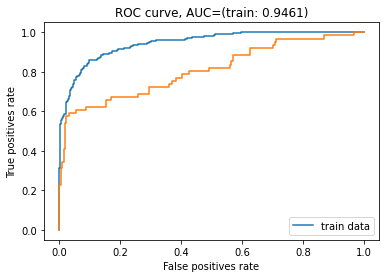

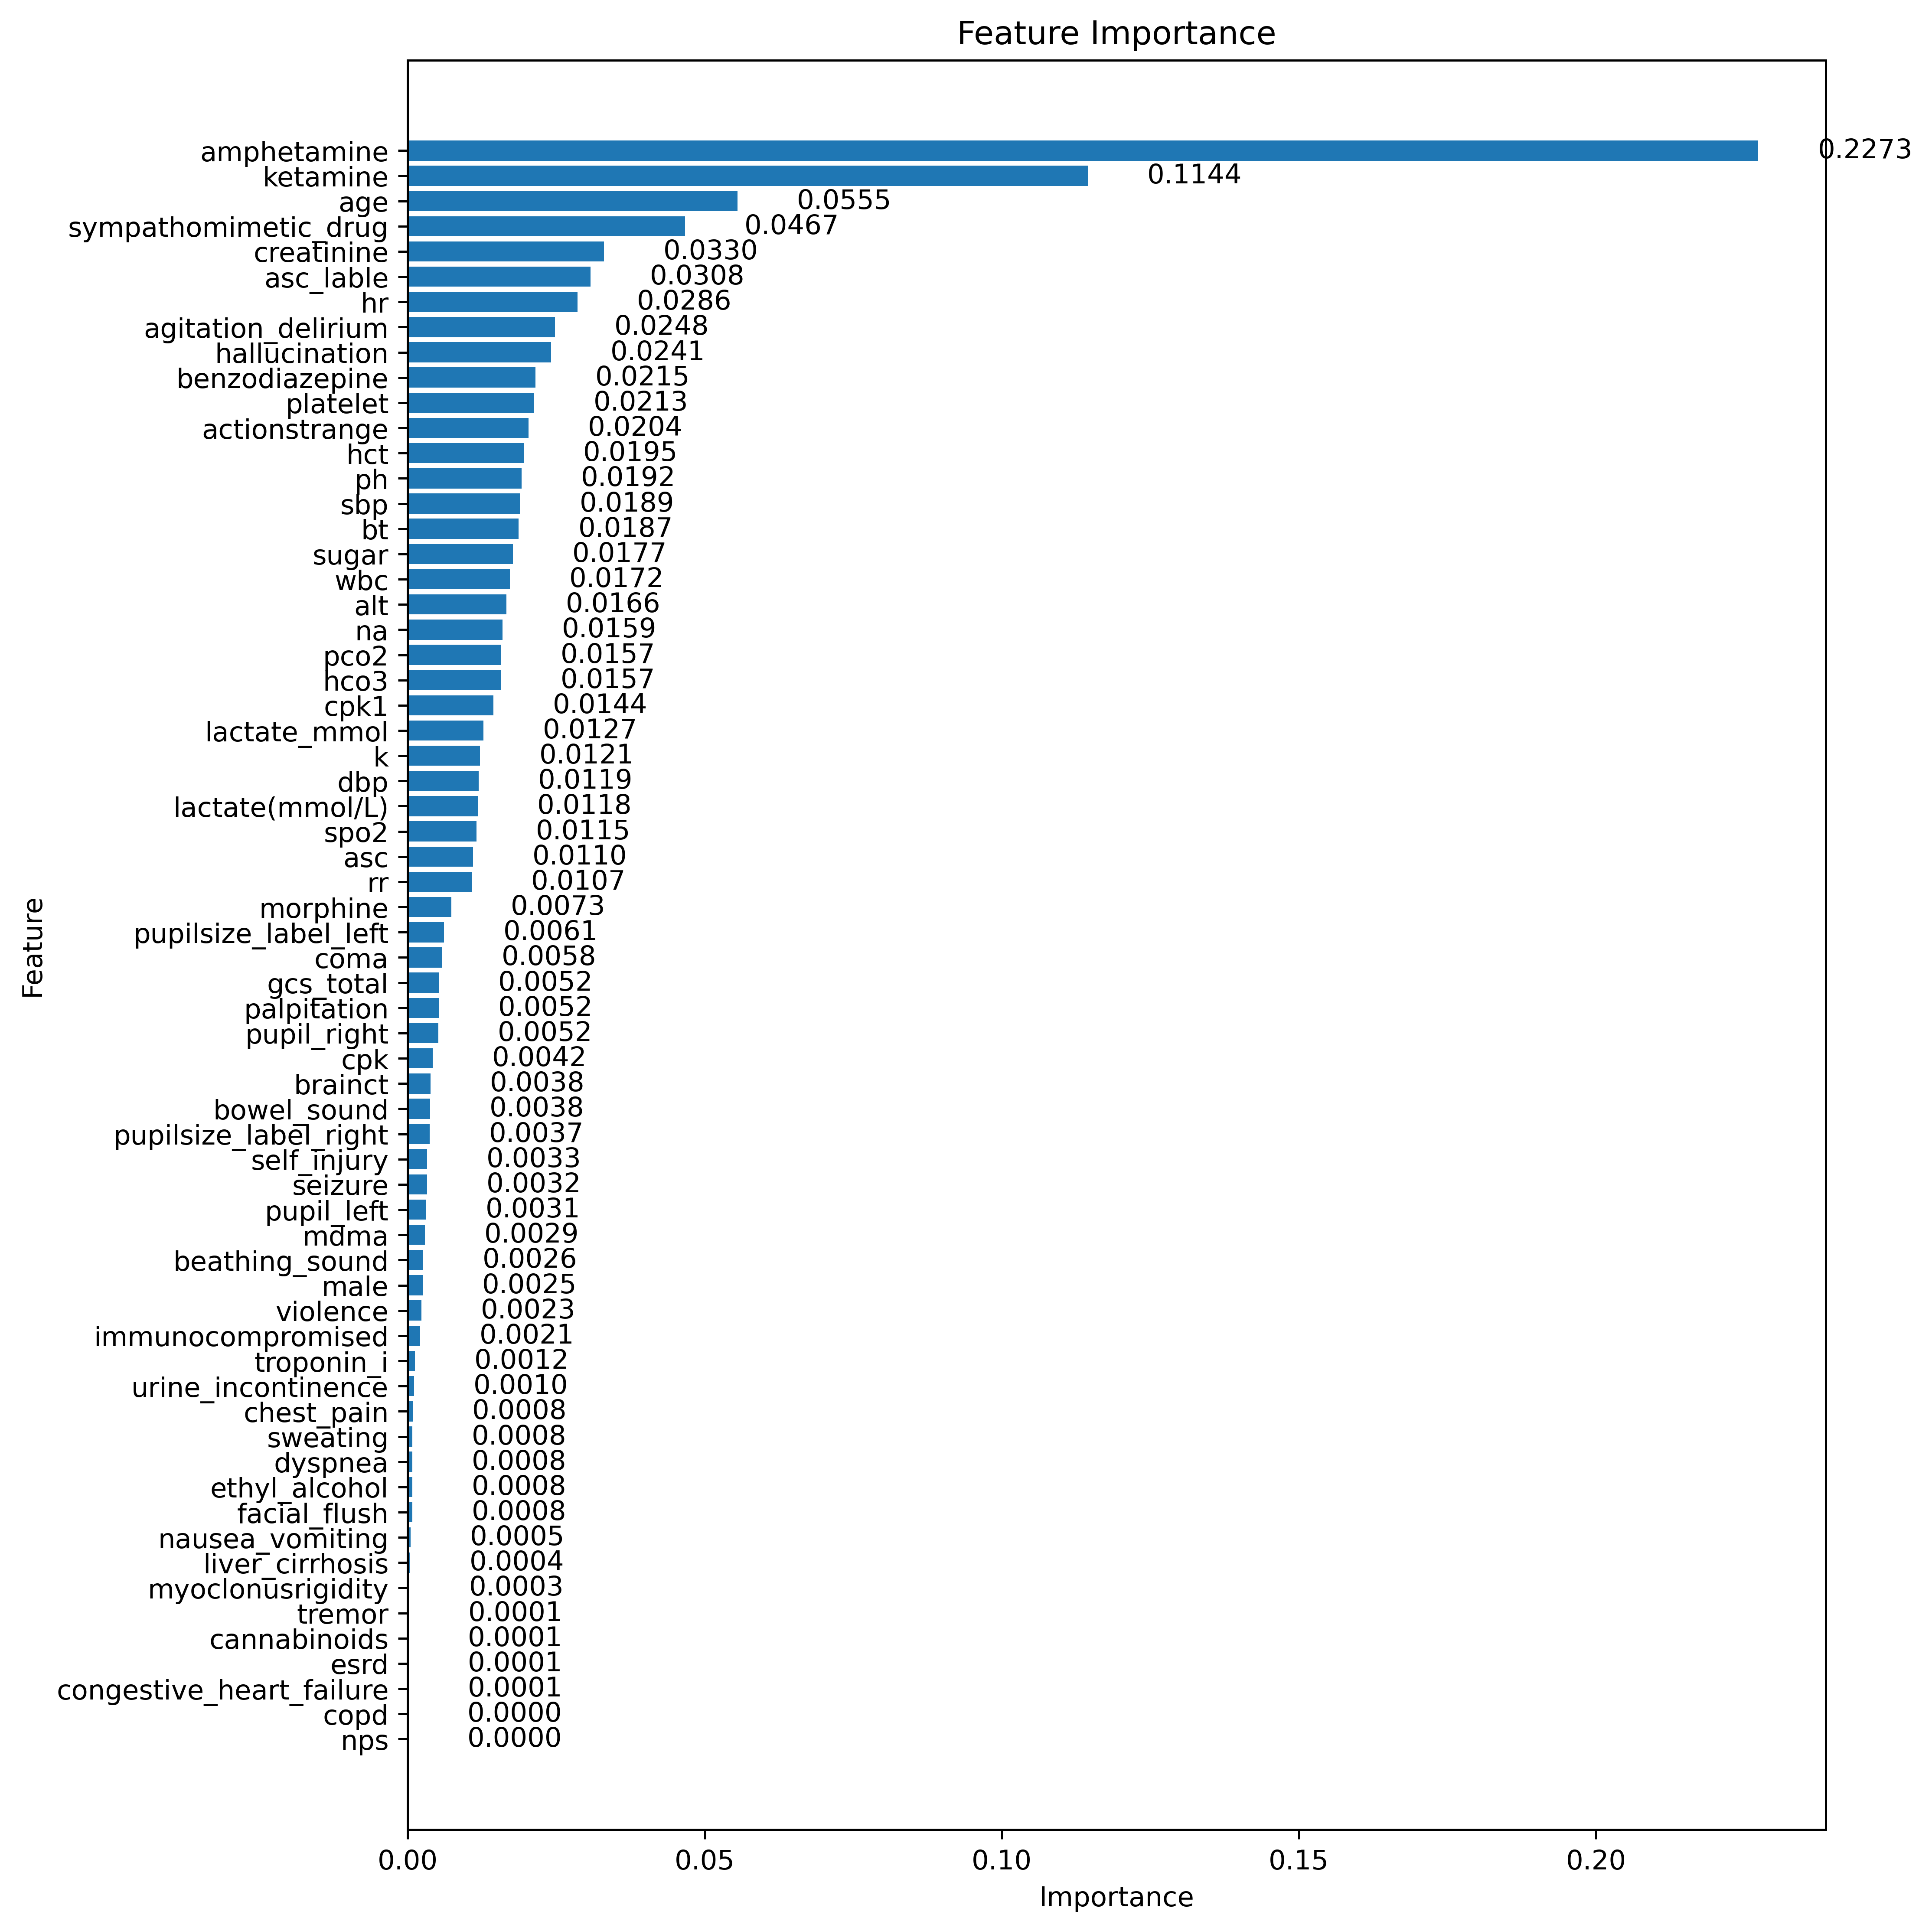

(1123, 64)


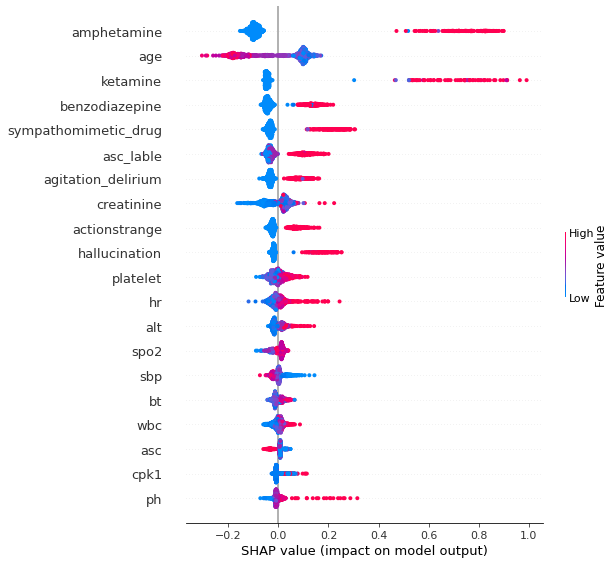

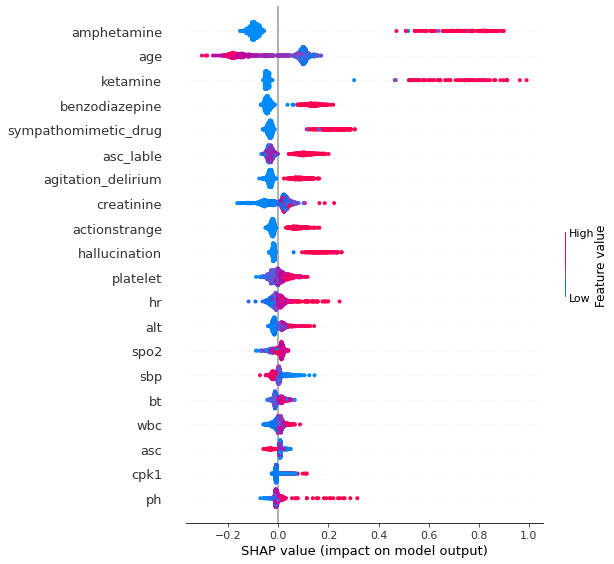

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# 定義參數空間
param_grid = {
    'n_estimators': [ 110],
    'learning_rate': [ 0.01],
    'max_depth': [5],
    'subsample': [0.7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 最佳AUC: 0.8286624120524155，最佳參數組合：{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110, 'subsample': 0.7}

# 創建GBM模型
gbm = GradientBoostingClassifier()


# 定義Grid Search對象
grid_search = GridSearchCV(gbm, param_grid, cv=5,verbose=False,scoring = 'roc_auc',return_train_score=True,n_jobs=2)

# 在訓練數據上進行Grid Search
grid_search.fit(X_train_smote, y_train_smote)


gbm_best_params = grid_search.best_params_



# 使用最佳參數組合的模型進行預測
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# 評估，打分數
print(f"最佳AUC: {grid_search.best_score_}，最佳參數組合：{grid_search.best_params_}")

# 取得 cross validation 的平均準確率及標準差
means_train = grid_search.cv_results_['mean_train_score']
stds_train = grid_search.cv_results_['std_train_score']
means_val = grid_search.cv_results_['mean_test_score']
stds_val = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")


# GBM
gbm = GradientBoostingClassifier(**gbm_best_params)
gbm.fit(X_train_smote, y_train_smote)

import matplotlib.pyplot as plt

y_pred_proba_train = gbm.predict_proba(X_train_smote)

fpr_train, tpr_train, _ = sklearn.metrics.roc_curve(y_train_smote, y_pred_proba_train[:, 1])

auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


plt.title(f"ROC curve, AUC=(train: {auc_train:.4f})")
plt.plot(fpr_train, tpr_train, label="train data")
plt.xlabel('False positives rate')
plt.ylabel('True positives rate')
plt.legend()


y_pred_proba_test = gbm.predict_proba(X_test)

# 使用模型進行預測
y_pred = gbm.predict(X_test)

predictions = [round(value) for value in y_pred]


fpr_test_final, tpr_test_final, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_test[:, 1])
plt.plot(fpr_test_final, tpr_test_final, label="test data")
auc_test_final = sklearn.metrics.auc(fpr_test_final, tpr_test_final)

gbm_auc = fpr_test_final,tpr_test_final,auc_test_final,f1_score(y_test, y_pred)*100 #組合用

# 轉換X為DataFrame物件
l = pd.DataFrame(X, columns=dataset.columns[1:])
# 設定圖表大小
plt.figure(figsize=(10, 10),dpi=450)

# 取得特徵重要性
importance = gbm.feature_importances_

# 建立特徵重要性的資料框
feature_importances = pd.DataFrame({'Feature': l.columns, 'Importance': importance})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

# 繪製特徵重要性長條圖
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# 反轉Y軸，讓重要性高的項目顯示在上方
plt.gca().invert_yaxis()

# 顯示特徵重要性數值
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', color='black', va='center')

# 調整Y軸刻度標籤
plt.yticks(range(len(feature_importances['Feature'])), feature_importances['Feature'])

plt.tight_layout()
plt.show()

import shap

# 建立SHAP TreeExplainer
explainer = shap.TreeExplainer(gbm)

# 將 X_train 轉換為 DataFrame 並指定特徵名稱
X_train_df = pd.DataFrame(X_train_smote, columns=l.columns)

# 計算SHAP值
shap_values = explainer.shap_values(X_train_df)

# 印出SHAP值的形狀
print(shap_values.shape)

# 繪製SHAP摘要圖
shap.summary_plot(shap_values, X_train_df)

# 繪製SHAP條形圖
# shap.summary_plot(shap_values, X_train_df, plot_type="bar")

# 繪製單個實例的SHAP力圖
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_df.iloc[0, :])

# 儲存SHAP摘要圖
shap.summary_plot(shap_values, X_train_df, show=False)
plt.savefig('All Variables gbm_shap.png', dpi=450)

Accuracy: 0.7777777777777778


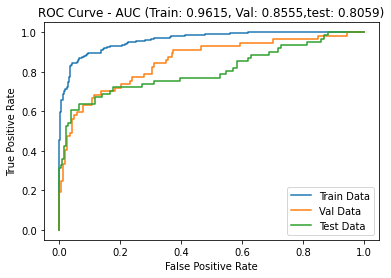

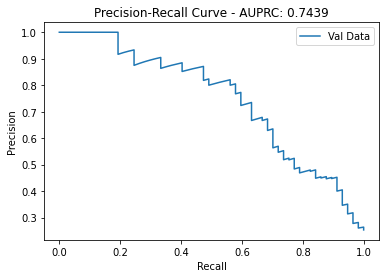

Val Result:

Accuracy Score: 77.78%
Precision Score: 100.00%
Recall Score: 12.28%
F1 score: 21.88%
Confusion Matrix:
[[168   0]
 [ 50   7]]
AUPRC: 0.7439
AUC Confidence Interval: (0.7941, 0.9146)
ACC Confidence Interval: (0.7244, 0.8311)
test Result:

Accuracy Score: 82.31%
Precision Score: 100.00%
Recall Score: 19.67%
F1 score: 32.88%
Confusion Matrix:
[[216   0]
 [ 49  12]]
AUC Confidence Interval: (0.7284, 0.8862)
ACC Confidence Interval: (0.7798, 0.8700)
Accuracy: 0.8533333333333334


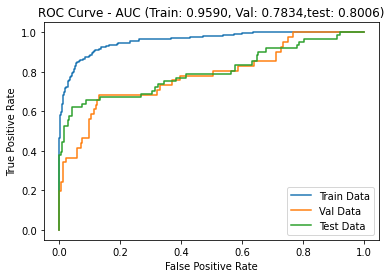

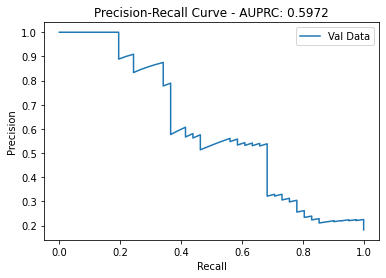

Val Result:

Accuracy Score: 85.33%
Precision Score: 100.00%
Recall Score: 19.51%
F1 score: 32.65%
Confusion Matrix:
[[184   0]
 [ 33   8]]
AUPRC: 0.5972
AUC Confidence Interval: (0.6969, 0.8713)
ACC Confidence Interval: (0.8089, 0.8978)
test Result:

Accuracy Score: 83.39%
Precision Score: 100.00%
Recall Score: 24.59%
F1 score: 39.47%
Confusion Matrix:
[[216   0]
 [ 46  15]]
AUC Confidence Interval: (0.7253, 0.8779)
ACC Confidence Interval: (0.7906, 0.8773)
Accuracy: 0.8266666666666667


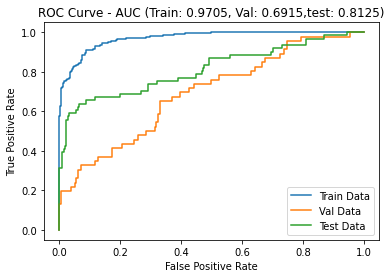

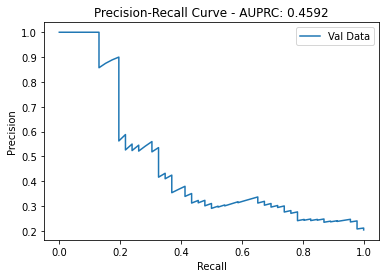

Val Result:

Accuracy Score: 82.67%
Precision Score: 88.89%
Recall Score: 17.39%
F1 score: 29.09%
Confusion Matrix:
[[178   1]
 [ 38   8]]
AUPRC: 0.4592
AUC Confidence Interval: (0.6032, 0.7750)
ACC Confidence Interval: (0.7733, 0.8711)
test Result:

Accuracy Score: 82.67%
Precision Score: 100.00%
Recall Score: 21.31%
F1 score: 35.14%
Confusion Matrix:
[[216   0]
 [ 48  13]]
AUC Confidence Interval: (0.7397, 0.8879)
ACC Confidence Interval: (0.7834, 0.8736)
Accuracy: 0.7991071428571429


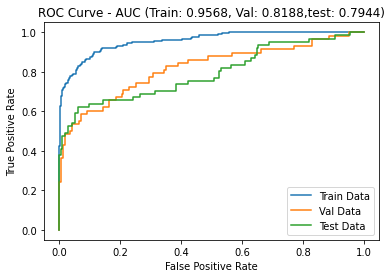

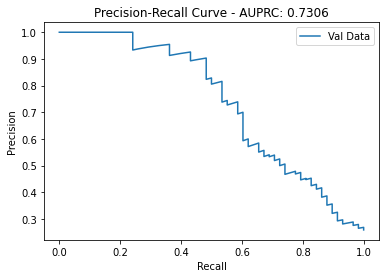

Val Result:

Accuracy Score: 79.91%
Precision Score: 100.00%
Recall Score: 22.41%
F1 score: 36.62%
Confusion Matrix:
[[166   0]
 [ 45  13]]
AUPRC: 0.7306
AUC Confidence Interval: (0.7472, 0.8859)
ACC Confidence Interval: (0.7455, 0.8482)
test Result:

Accuracy Score: 81.59%
Precision Score: 100.00%
Recall Score: 16.39%
F1 score: 28.17%
Confusion Matrix:
[[216   0]
 [ 51  10]]
AUC Confidence Interval: (0.7190, 0.8722)
ACC Confidence Interval: (0.7726, 0.8628)
Accuracy: 0.7946428571428571


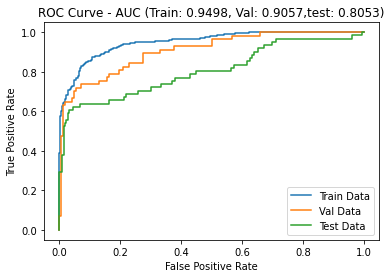

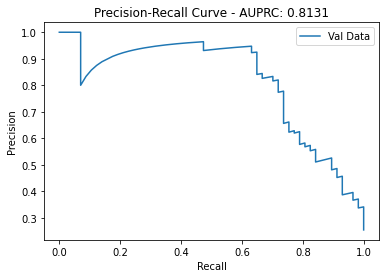

Val Result:

Accuracy Score: 79.46%
Precision Score: 92.31%
Recall Score: 21.05%
F1 score: 34.29%
Confusion Matrix:
[[166   1]
 [ 45  12]]
AUPRC: 0.8131
AUC Confidence Interval: (0.8572, 0.9456)
ACC Confidence Interval: (0.7411, 0.8438)
test Result:

Accuracy Score: 82.31%
Precision Score: 100.00%
Recall Score: 19.67%
F1 score: 32.88%
Confusion Matrix:
[[216   0]
 [ 49  12]]
AUC Confidence Interval: (0.7291, 0.8812)
ACC Confidence Interval: (0.7798, 0.8700)


In [98]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5)
count = 0
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建XGBoost分类器
    gbm_model = GradientBoostingClassifier(**gbm_best_params, random_state=70)
    
    # 訓練模型
    gbm_model.fit(x_train, y_train)
    
    # 在測試集上进行預測
    y_pred = gbm_model.predict(x_test)
    
    # 計算模型的准确率或其他評估指标
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線数据
    y_pred_proba_train = gbm_model.predict_proba(x_train)
    gbm_fpr_train, gbm_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    gbm_auc_train = sklearn.metrics.auc(gbm_fpr_train, gbm_tpr_train)

    y_pred_proba_test = gbm_model.predict_proba(x_test)
    gbm_fpr_test, gbm_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    gbm_auc_test = sklearn.metrics.auc(gbm_fpr_test, gbm_tpr_test)

    # 在測試集上進行預測
    y_pred_last = gbm_model.predict(X_test)

    y_pred_proba_last_test = gbm_model.predict_proba(X_test)
    gbm_fpr_last_test, gbm_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    gbm_auc_last_test = sklearn.metrics.auc(gbm_fpr_last_test, gbm_tpr_last_test)
    

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

    # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    gbm_precision_last, gbm_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    gbm_auprc_last = sklearn.metrics.auc(gbm_recall_last, gbm_precision_last) 

    # 繪製ROC曲線
    plt.plot(gbm_fpr_train, gbm_tpr_train, label="Train Data")
    plt.plot(gbm_fpr_test, gbm_tpr_test, label="Val Data")
    plt.plot(gbm_fpr_last_test, gbm_tpr_last_test, label="Test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {gbm_auc_train:.4f}, Val: {gbm_auc_test:.4f},test: {gbm_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 計算並顯示AUC的信賴區間
    confidence_lower, confidence_upper = CI(y_test_cv, y_pred_proba_test[:, 1], 0.5, score_type='auc')
    print(f"AUC Confidence Interval: ({confidence_lower:.4f}, {confidence_upper:.4f})")

    # 計算並顯示AUC的信賴區間
    confidence_lower, confidence_upper = CI(y_test_cv, y_pred_proba_test[:, 1], 0.5, score_type='acc')
    print(f"ACC Confidence Interval: ({confidence_lower:.4f}, {confidence_upper:.4f})")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")

    # 計算並顯示AUC的信賴區間
    confidence_lower, confidence_upper = CI(y_test, y_pred_proba_last_test[:, 1], 0.5, score_type='auc')
    print(f"AUC Confidence Interval: ({confidence_lower:.4f}, {confidence_upper:.4f})")

    # 計算並顯示AUC的信賴區間
    confidence_lower, confidence_upper = CI(y_test, y_pred_proba_last_test[:, 1], 0.5, score_type='acc')
    print(f"ACC Confidence Interval: ({confidence_lower:.4f}, {confidence_upper:.4f})")

In [ ]:
gbm_best_params

{'learning_rate': 0.03,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100,
 'subsample': 0.6}

In [ ]:
best_index = np.argmax(grid_search.best_score_)  # 獲取最佳得分的索引
best_train_score = means_train[best_index]
best_val_score = means_val[best_index]

print("Best Model Train Score:", best_train_score)
print("Best Model Validation Score:", best_val_score)

Best Model Train Score: 0.8644493679195332
Best Model Validation Score: 0.8226819344849421


LDA_SMOTE

Fitting 5 folds for each of 6 candidates, totalling 30 fits
最佳AUC: 0.8175173867617508，最佳參數組合：{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}
訓練集平均AUC: 0.8682777452107316, 標準差: 0.011339647860579389, 驗證集平均AUC: 0.8175173867617508, 標準差: 0.04924372201943423, 參數組合: {'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}
訓練集平均AUC: 0.8682777452107316, 標準差: 0.011339647860579389, 驗證集平均AUC: 0.8175173867617508, 標準差: 0.04924372201943423, 參數組合: {'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 1e-05}
訓練集平均AUC: 0.8682777452107316, 標準差: 0.011339647860579389, 驗證集平均AUC: 0.8175173867617508, 標準差: 0.04924372201943423, 參數組合: {'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 1e-06}
訓練集平均AUC: 0.8682777452107316, 標準差: 0.011339647860579389, 驗證集平均AUC: 0.8175173867617508, 標

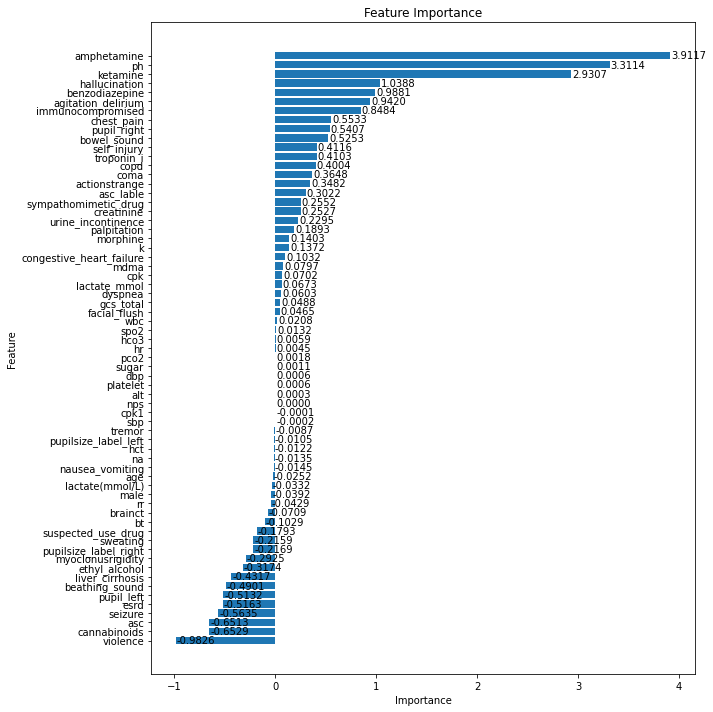

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve
# 定義參數空間
param_grid = {
    'solver': ['svd', 'lsqr'],
    'shrinkage': [None],
    'priors': [ None],
    'n_components' : [None], 
    'store_covariance' : [True], 
    'tol' : [1e-4,1e-5,1e-6]
}

# 創建LDA模型
lda = LinearDiscriminantAnalysis()

# 定義Grid Search對象
grid_search_lda = GridSearchCV(lda, param_grid, cv=5,verbose=True,scoring = 'roc_auc',return_train_score=True,n_jobs=2)

grid_search_lda.fit(X_train_smote, y_train_smote)

# 評估，打分數
print(f"最佳AUC: {grid_search_lda.best_score_}，最佳參數組合：{grid_search_lda.best_params_}")
# 取得 cross validation 的平均準確率及標準差

means_train = grid_search_lda.cv_results_['mean_train_score']
stds_train = grid_search_lda.cv_results_['std_train_score']
means_val = grid_search_lda.cv_results_['mean_test_score']
stds_val = grid_search_lda.cv_results_['std_test_score']
params = grid_search_lda.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")
    
lda_best_params = grid_search_lda.best_params_

# 使用最佳參數組合的模型進行預測
lda = LinearDiscriminantAnalysis(**lda_best_params)
lda.fit(X_train_smote, y_train_smote)

# 取得特徵重要性
importance = lda.coef_[0]

# 建立特徵重要性的資料框
feature_importances = pd.DataFrame({'Feature': dataset.columns[1:], 'Importance': importance})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 10))

# 繪製特徵重要性
plt.barh(feature_importances['Feature'], feature_importances['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.gca().invert_yaxis()

# 顯示特徵重要性值
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.01, i, f'{v:.4f}', color='black', va='center')

plt.yticks(range(len(feature_importances['Feature'])), feature_importances['Feature'])

plt.tight_layout()
plt.show()

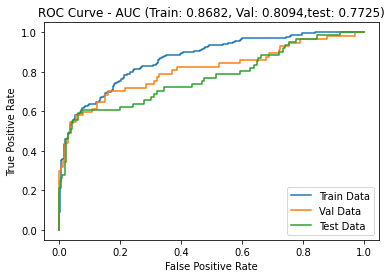

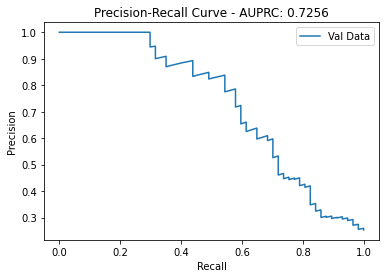

Val Result:

Accuracy Score: 84.89%
Precision Score: 82.86%
Recall Score: 50.88%
F1 score: 63.04%
Confusion Matrix:
[[162   6]
 [ 28  29]]
AUPRC: 0.7256
test Result:

Accuracy Score: 86.64%
Precision Score: 83.33%
Recall Score: 49.18%
F1 score: 61.86%
Confusion Matrix:
[[210   6]
 [ 31  30]]


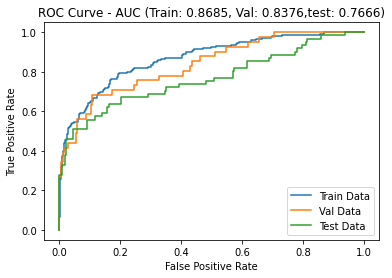

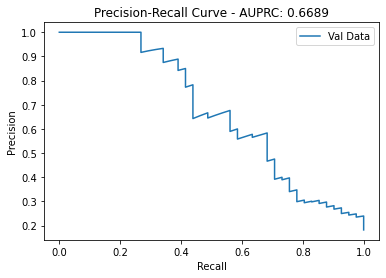

Val Result:

Accuracy Score: 85.33%
Precision Score: 64.29%
Recall Score: 43.90%
F1 score: 52.17%
Confusion Matrix:
[[174  10]
 [ 23  18]]
AUPRC: 0.6689
test Result:

Accuracy Score: 85.20%
Precision Score: 77.78%
Recall Score: 45.90%
F1 score: 57.73%
Confusion Matrix:
[[208   8]
 [ 33  28]]


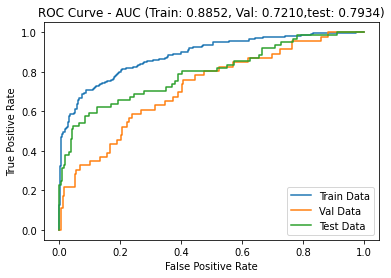

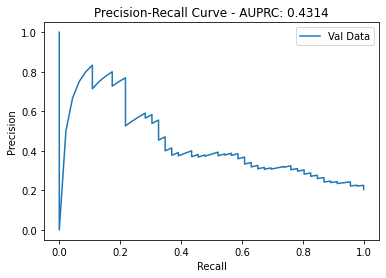

Val Result:

Accuracy Score: 80.44%
Precision Score: 53.57%
Recall Score: 32.61%
F1 score: 40.54%
Confusion Matrix:
[[166  13]
 [ 31  15]]
AUPRC: 0.4314
test Result:

Accuracy Score: 85.20%
Precision Score: 76.32%
Recall Score: 47.54%
F1 score: 58.59%
Confusion Matrix:
[[207   9]
 [ 32  29]]


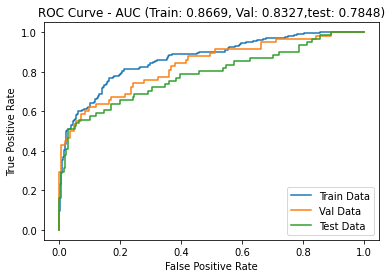

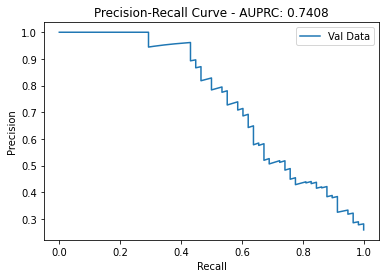

Val Result:

Accuracy Score: 83.93%
Precision Score: 78.95%
Recall Score: 51.72%
F1 score: 62.50%
Confusion Matrix:
[[158   8]
 [ 28  30]]
AUPRC: 0.7408
test Result:

Accuracy Score: 86.64%
Precision Score: 81.58%
Recall Score: 50.82%
F1 score: 62.63%
Confusion Matrix:
[[209   7]
 [ 30  31]]


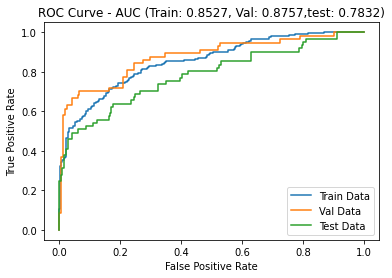

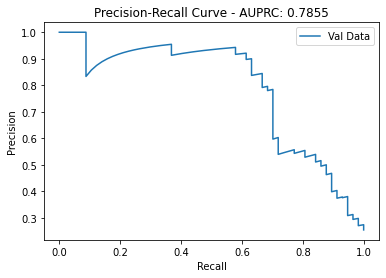

Val Result:

Accuracy Score: 88.84%
Precision Score: 90.00%
Recall Score: 63.16%
F1 score: 74.23%
Confusion Matrix:
[[163   4]
 [ 21  36]]
AUPRC: 0.7855
test Result:

Accuracy Score: 85.20%
Precision Score: 77.78%
Recall Score: 45.90%
F1 score: 57.73%
Confusion Matrix:
[[208   8]
 [ 33  28]]


In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
count = 0
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建LDA
    lda_model = LinearDiscriminantAnalysis(**lda_best_params)
    
    # 訓練模型
    lda_model.fit(x_train, y_train)
    
    # 在測試集上進行預測
    y_pred = lda_model.predict(x_test)
    
    # 計算模型的準確率或其他評估指標
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線數據
    y_pred_proba_train = lda_model.predict_proba(x_train)
    lda_fpr_train, lda_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    lda_auc_train = sklearn.metrics.auc(lda_fpr_train, lda_tpr_train)

    y_pred_proba_test = lda_model.predict_proba(x_test)
    lda_fpr_test, lda_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    lda_auc_test = sklearn.metrics.auc(lda_fpr_test, lda_tpr_test)

    # 在測試集上進行預測
    y_pred_last = lda_model.predict(X_test)

    y_pred_proba_last_test = lda_model.predict_proba(X_test)
    lda_fpr_last_test, lda_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    lda_auc_last_test = sklearn.metrics.auc(lda_fpr_last_test, lda_tpr_last_test)
  

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

     # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    lda_precision_last, lda_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    lda_auprc_last = sklearn.metrics.auc(lda_recall_last, lda_precision_last) 

    # 繪製ROC曲線
    plt.plot(lda_fpr_train, lda_tpr_train, label="Train Data")
    plt.plot(lda_fpr_test, lda_tpr_test, label="Val Data")
    plt.plot(lda_fpr_last_test, lda_tpr_last_test, label="Test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {lda_auc_train:.4f}, Val: {lda_auc_test:.4f},test: {lda_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")

MLR


90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\kfcteam-cy\Anaconda3\envs\pangolin\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l

最佳AUC: 0.8190252971528917，最佳參數組合：{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
訓練集平均AUC: 0.513648258083624, 標準差: 0.0369037866689481, 驗證集平均AUC: 0.5069142803905146, 標準差: 0.05236304710252194, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
訓練集平均AUC: nan, 標準差: nan, 驗證集平均AUC: nan, 標準差: nan, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
訓練集平均AUC: nan, 標準差: nan, 驗證集平均AUC: nan, 標準差: nan, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
訓練集平均AUC: 0.5140095818675092, 標準差: 0.03709589434765864, 驗證集平均AUC: 0.5073402106869406, 標準差: 0.05258064552894609, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
訓練集平均AUC: 0.724546788046051, 標準差: 0.017230552345439885, 驗證集平均AUC: 0.6657853482836877, 標準差: 0.031819293743367075, 參數組合: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
訓練集平均AUC: 0.8657203674781988, 標準差: 0.011689144869835438, 驗證集平均AUC: 0.8190252971528917, 標準差: 0.051269861862504644

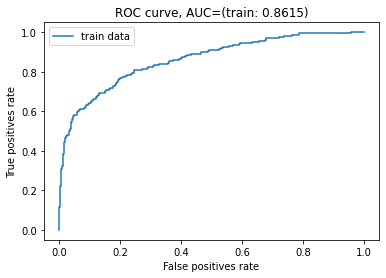

In [17]:
from sklearn.linear_model import LogisticRegression

# 定義參數空間
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['saga', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 200, 500]
}

mlr = LogisticRegression(multi_class='multinomial')

# 定義Grid Search對象
grid_search = GridSearchCV(mlr, param_grid, cv=5,verbose=False,scoring = 'roc_auc',return_train_score=True,n_jobs=2)

# 在訓練數據上進行Grid Search
grid_search.fit(X_train_smote, y_train_smote)

mlr_best_params = grid_search.best_params_


# 使用最佳參數組合的模型進行預測
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


# 評估，打分數
print(f"最佳AUC: {grid_search.best_score_}，最佳參數組合：{grid_search.best_params_}")

# 取得 cross validation 的平均準確率及標準差
means_train = grid_search.cv_results_['mean_train_score']
stds_train = grid_search.cv_results_['std_train_score']
means_val = grid_search.cv_results_['mean_test_score']
stds_val = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")


# MLR
mlr = LogisticRegression(**mlr_best_params,multi_class='multinomial')
mlr.fit(X_train_smote, y_train_smote)

y_pred_proba_train = mlr.predict_proba(X_train_smote)

fpr_train, tpr_train, _ = sklearn.metrics.roc_curve(y_train_smote, y_pred_proba_train[:, 1])

auc_train = sklearn.metrics.auc(fpr_train, tpr_train)


plt.title(f"ROC curve, AUC=(train: {auc_train:.4f})")
# plt.plot(fpr_val, tpr_val, label="val data")
plt.plot(fpr_train, tpr_train, label="train data")
plt.xlabel('False positives rate')
plt.ylabel('True positives rate')
plt.legend()


y_pred_proba_test = mlr.predict_proba(X_test)

# 使用模型進行預測
y_pred = mlr.predict(X_test)

predictions = [round(value) for value in y_pred]



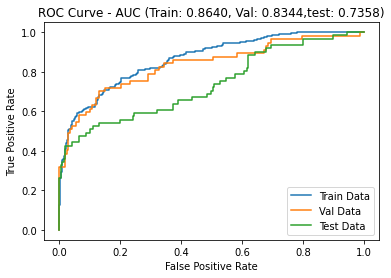

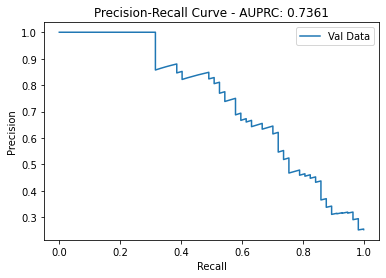

Val Result:

Accuracy Score: 83.56%
Precision Score: 83.33%
Recall Score: 43.86%
F1 score: 57.47%
Confusion Matrix:
[[163   5]
 [ 32  25]]
AUPRC: 0.7361
test Result:

Accuracy Score: 84.84%
Precision Score: 78.79%
Recall Score: 42.62%
F1 score: 55.32%
Confusion Matrix:
[[209   7]
 [ 35  26]]


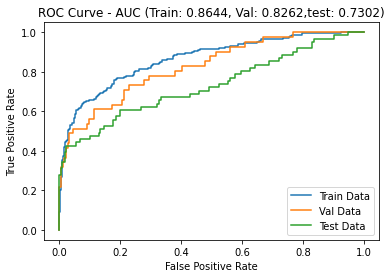

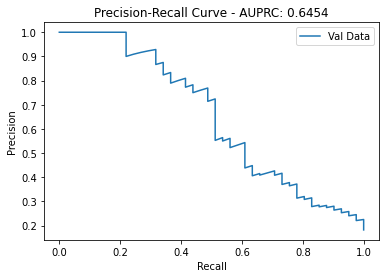

Val Result:

Accuracy Score: 88.00%
Precision Score: 76.92%
Recall Score: 48.78%
F1 score: 59.70%
Confusion Matrix:
[[178   6]
 [ 21  20]]
AUPRC: 0.6454
test Result:

Accuracy Score: 84.48%
Precision Score: 76.47%
Recall Score: 42.62%
F1 score: 54.74%
Confusion Matrix:
[[208   8]
 [ 35  26]]


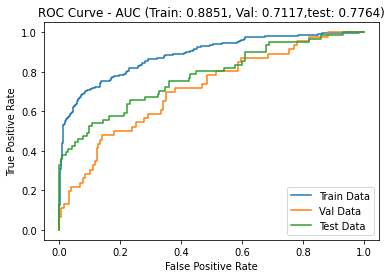

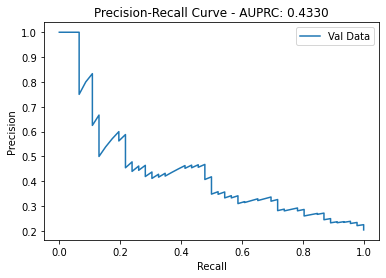

Val Result:

Accuracy Score: 79.11%
Precision Score: 47.62%
Recall Score: 21.74%
F1 score: 29.85%
Confusion Matrix:
[[168  11]
 [ 36  10]]
AUPRC: 0.4330
test Result:

Accuracy Score: 83.39%
Precision Score: 69.23%
Recall Score: 44.26%
F1 score: 54.00%
Confusion Matrix:
[[204  12]
 [ 34  27]]


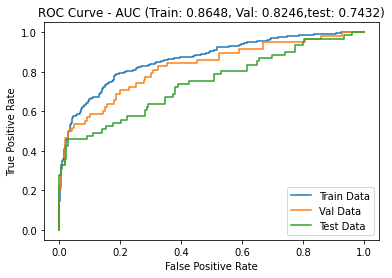

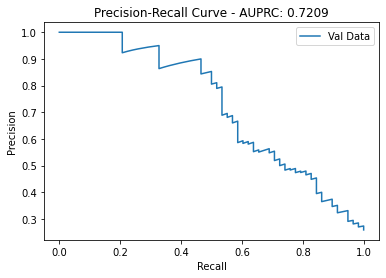

Val Result:

Accuracy Score: 83.48%
Precision Score: 75.61%
Recall Score: 53.45%
F1 score: 62.63%
Confusion Matrix:
[[156  10]
 [ 27  31]]
AUPRC: 0.7209
test Result:

Accuracy Score: 85.92%
Precision Score: 82.35%
Recall Score: 45.90%
F1 score: 58.95%
Confusion Matrix:
[[210   6]
 [ 33  28]]


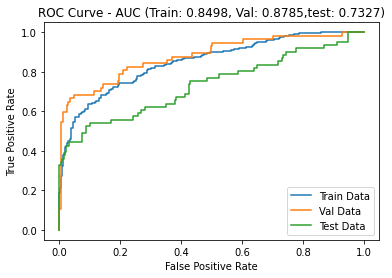

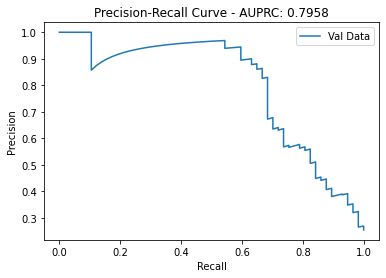

Val Result:

Accuracy Score: 87.95%
Precision Score: 89.47%
Recall Score: 59.65%
F1 score: 71.58%
Confusion Matrix:
[[163   4]
 [ 23  34]]
AUPRC: 0.7958
test Result:

Accuracy Score: 84.84%
Precision Score: 77.14%
Recall Score: 44.26%
F1 score: 56.25%
Confusion Matrix:
[[208   8]
 [ 34  27]]


In [18]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
count = 0
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建mlr
    mlr_model = LogisticRegression(**mlr_best_params,multi_class='multinomial')
    
    # 訓練模型
    mlr_model.fit(x_train, y_train)
    
    # 在測試集上進行預測
    y_pred = mlr_model.predict(x_test)
    
    # 計算模型的準確率或其他評估指標
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)
    # print("Accuracy:", accuracy)

    # 在訓練集和測試集上計算預測概率和ROC曲線數據
    y_pred_proba_train = mlr_model.predict_proba(x_train)
    mlr_fpr_train, mlr_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    mlr_auc_train = sklearn.metrics.auc(mlr_fpr_train, mlr_tpr_train)

    y_pred_proba_test = mlr_model.predict_proba(x_test)
    mlr_fpr_test, mlr_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    mlr_auc_test = sklearn.metrics.auc(mlr_fpr_test, mlr_tpr_test)

    # 在測試集上進行預測
    y_pred_last = mlr_model.predict(X_test)

    y_pred_proba_last_test = mlr_model.predict_proba(X_test)
    mlr_fpr_last_test, mlr_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    mlr_auc_last_test = sklearn.metrics.auc(mlr_fpr_last_test, mlr_tpr_last_test)

     # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    mlr_precision_last, mlr_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    mlr_auprc_last = sklearn.metrics.auc(mlr_recall_last, mlr_precision_last)   

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

    # 繪製ROC曲線
    plt.plot(mlr_fpr_train, mlr_tpr_train, label="Train Data")
    plt.plot(mlr_fpr_test, mlr_tpr_test, label="Val Data")
    plt.plot(mlr_fpr_last_test, mlr_tpr_last_test, label="Test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {mlr_auc_train:.4f}, Val: {mlr_auc_test:.4f},test: {mlr_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")

MLP

In [19]:
from sklearn.neural_network import MLPClassifier

# 定義參數空間
param_grid = {
    'hidden_layer_sizes': [(100, 100)],
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'max_iter': [500],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.01]
}

mlp = MLPClassifier(early_stopping=True)

# 定義Grid Search對象
grid_search = GridSearchCV(mlp, param_grid, cv=5, verbose=False, scoring='roc_auc', return_train_score=True)

# 在訓練數據上進行Grid Search
grid_search.fit(X_train_smote, y_train_smote)

mlp_best_params = grid_search.best_params_

# 使用最佳參數組合的模型進行預測
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# 評估，打分數
print(f"最佳AUC: {grid_search.best_score_}，最佳參數組合：{grid_search.best_params_}")
# 取得 cross validation 的平均準確率及標準差
means_train = grid_search.cv_results_['mean_train_score']
stds_train = grid_search.cv_results_['std_train_score']
means_val = grid_search.cv_results_['mean_test_score']
stds_val = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train, stdev_train, mean_val, stdev_val, param in zip(means_train, stds_train, means_val, stds_val, params):
    print(f"訓練集平均AUC: {mean_train}, 標準差: {stdev_train}, 驗證集平均AUC: {mean_val}, 標準差: {stdev_val}, 參數組合: {param}")


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

最佳AUC: 0.6780293521546892，最佳參數組合：{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'lbfgs'}
訓練集平均AUC: 0.8936275356160742, 標準差: 0.03288328087195912, 驗證集平均AUC: 0.6780293521546892, 標準差: 0.05397616874839497, 參數組合: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'lbfgs'}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


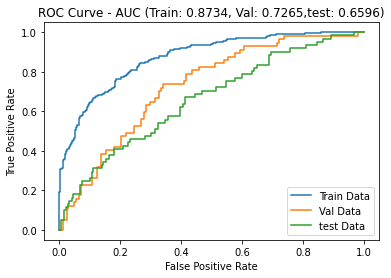

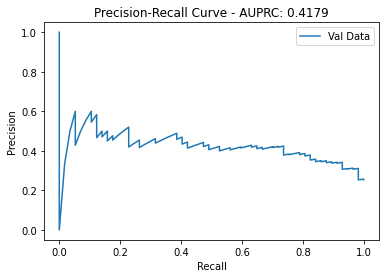

Val Result:

Accuracy Score: 73.78%
Precision Score: 46.43%
Recall Score: 22.81%
F1 score: 30.59%
Confusion Matrix:
[[153  15]
 [ 44  13]]
AUPRC: 0.4179
test Result:

Accuracy Score: 76.53%
Precision Score: 44.12%
Recall Score: 24.59%
F1 score: 31.58%
Confusion Matrix:
[[197  19]
 [ 46  15]]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


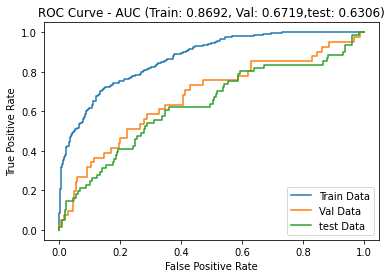

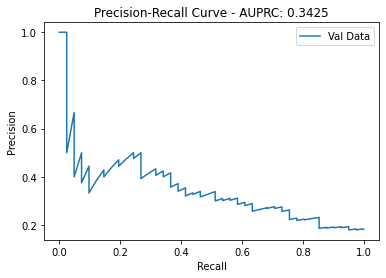

Val Result:

Accuracy Score: 79.56%
Precision Score: 40.74%
Recall Score: 26.83%
F1 score: 32.35%
Confusion Matrix:
[[168  16]
 [ 30  11]]
AUPRC: 0.3425
test Result:

Accuracy Score: 75.81%
Precision Score: 41.18%
Recall Score: 22.95%
F1 score: 29.47%
Confusion Matrix:
[[196  20]
 [ 47  14]]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


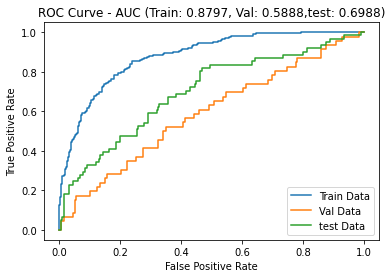

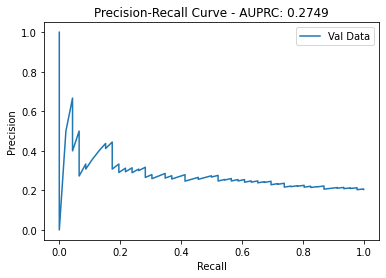

Val Result:

Accuracy Score: 78.22%
Precision Score: 42.11%
Recall Score: 17.39%
F1 score: 24.62%
Confusion Matrix:
[[168  11]
 [ 38   8]]
AUPRC: 0.2749
test Result:

Accuracy Score: 77.98%
Precision Score: 50.00%
Recall Score: 27.87%
F1 score: 35.79%
Confusion Matrix:
[[199  17]
 [ 44  17]]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


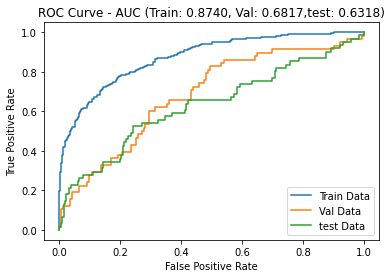

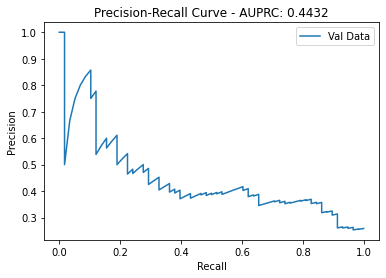

Val Result:

Accuracy Score: 73.21%
Precision Score: 47.22%
Recall Score: 29.31%
F1 score: 36.17%
Confusion Matrix:
[[147  19]
 [ 41  17]]
AUPRC: 0.4432
test Result:

Accuracy Score: 77.26%
Precision Score: 47.22%
Recall Score: 27.87%
F1 score: 35.05%
Confusion Matrix:
[[197  19]
 [ 44  17]]


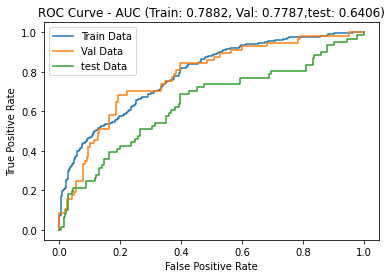

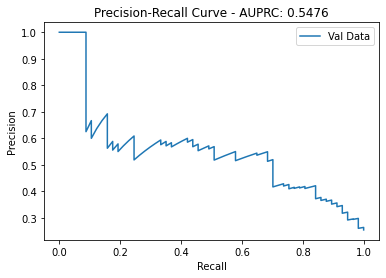

Val Result:

Accuracy Score: 75.89%
Precision Score: 56.00%
Recall Score: 24.56%
F1 score: 34.15%
Confusion Matrix:
[[156  11]
 [ 43  14]]
AUPRC: 0.5476
test Result:

Accuracy Score: 75.81%
Precision Score: 40.62%
Recall Score: 21.31%
F1 score: 27.96%
Confusion Matrix:
[[197  19]
 [ 48  13]]


In [20]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
count = 0
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train_smote, y_train_smote):
    if count == 5:
        break
    count = count + 1 
    x_train, x_test = X_train_smote[train_index], X_train_smote[test_index]
    y_train, y_test_cv = y_train_smote[train_index], y_train_smote[test_index]

    # 創建MLP模型
    mlp_model = MLPClassifier(**mlp_best_params, random_state=31)
    
    # 訓練模型
    mlp_model.fit(x_train, y_train)
    
    # 在測試集上進行預測
    y_pred = mlp_model.predict(x_test)
    
    # 計算模型的準確率或其他評估指標
    accuracy = sklearn.metrics.accuracy_score(y_test_cv, y_pred)

    # 在訓練集和測試集上計算預測概率和ROC曲線數據
    y_pred_proba_train = mlp_model.predict_proba(x_train)
    mlp_fpr_train, mlp_tpr_train, _ = sklearn.metrics.roc_curve(y_train, y_pred_proba_train[:, 1])
    mlp_auc_train = sklearn.metrics.auc(mlp_fpr_train, mlp_tpr_train)

    y_pred_proba_test = mlp_model.predict_proba(x_test)
    mlp_fpr_test, mlp_tpr_test, _ = sklearn.metrics.roc_curve(y_test_cv, y_pred_proba_test[:, 1])
    mlp_auc_test = sklearn.metrics.auc(mlp_fpr_test, mlp_tpr_test)

    # 在測試集上進行預測
    y_pred_last = mlp_model.predict(X_test)

    y_pred_proba_last_test = mlp_model.predict_proba(X_test)
    mlp_fpr_last_test, mlp_tpr_last_test, _ = sklearn.metrics.roc_curve(y_test, y_pred_proba_last_test[:, 1])
    mlp_auc_last_test = sklearn.metrics.auc(mlp_fpr_last_test, mlp_tpr_last_test)
    

    # 計算精確率和召回率以繪製P-R曲線
    precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test_cv, y_pred_proba_test[:, 1])
    auprc = sklearn.metrics.auc(recall, precision)

    # 畫疊圖用
    # 計算精確率和召回率以繪製P-R曲線
    mlp_precision_last, mlp_recall_last, _ = sklearn.metrics.precision_recall_curve(y_test, y_pred_proba_last_test[:, 1])
    mlp_auprc_last = sklearn.metrics.auc(mlp_recall_last, mlp_precision_last)


    # 繪製ROC曲線
    plt.plot(mlp_fpr_train, mlp_tpr_train, label="Train Data")
    plt.plot(mlp_fpr_test, mlp_tpr_test, label="Val Data")
    plt.plot(mlp_fpr_last_test, mlp_tpr_last_test, label="test Data")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - AUC (Train: {mlp_auc_train:.4f}, Val: {mlp_auc_test:.4f},test: {mlp_auc_last_test:.4f})')
    plt.legend()
    plt.show()

    # 繪製P-R曲線
    plt.plot(recall, precision, label="Val Data")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - AUPRC: {auprc:.4f}')
    plt.legend()
    plt.show()

    
    # 打印结果
    print("Val Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test_cv, y_pred)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_cv, y_pred)}")
    print(f"AUPRC: {auprc:.4f}")

    # 打印结果
    print("test Result:\n")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Precision Score: {precision_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Recall Score: {recall_score(y_test, y_pred_last)*100:.2f}%")
    print(f"F1 score: {f1_score(y_test, y_pred_last)*100:.2f}%")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_last)}")

疊圖AUC-train

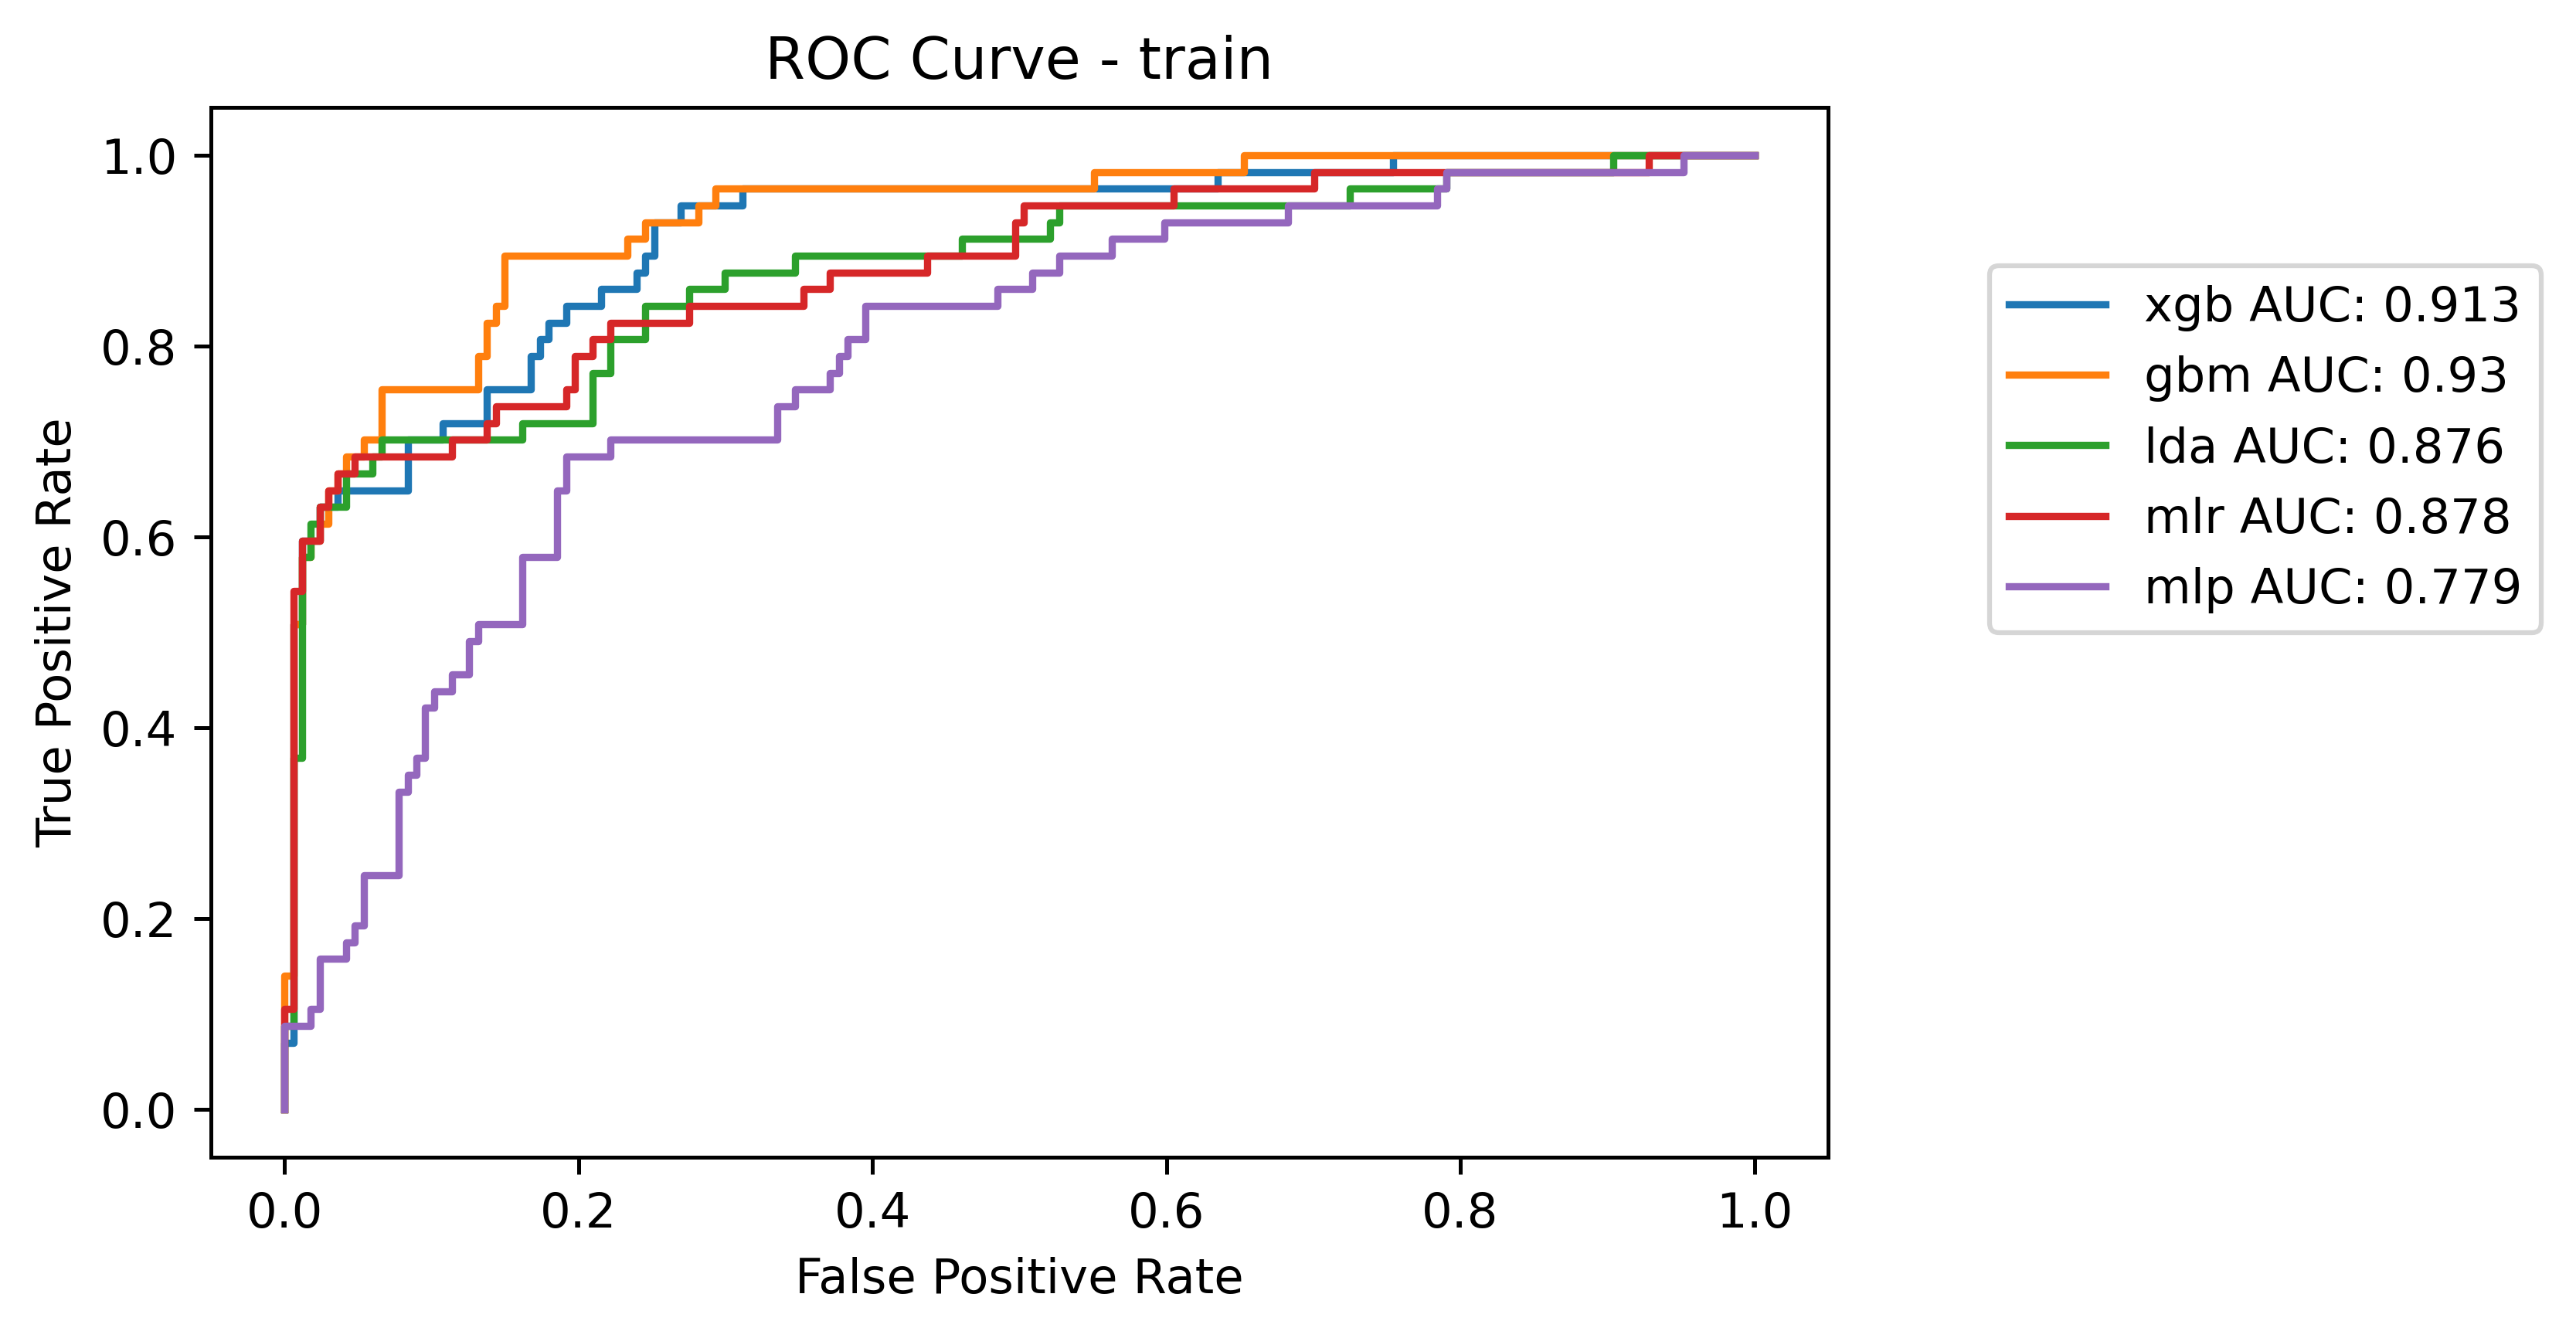

In [23]:
    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(xgb_fpr_test, xgb_tpr_test, label="xgb AUC: "+str(round(xgb_auc_test,3)))
    plt.plot(gbm_fpr_test, gbm_tpr_test, label="gbm AUC: "+str(round(gbm_auc_test,3)))
    plt.plot(lda_fpr_test, lda_tpr_test, label="lda AUC: "+str(round(lda_auc_test,3)))
    plt.plot(mlr_fpr_test, mlr_tpr_test, label="mlr AUC: "+str(round(mlr_auc_test,3)))
    plt.plot(mlp_fpr_test, mlp_tpr_test, label="mlp AUC: "+str(round(mlp_auc_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - train')
    plt.legend(loc = (1.1,0.5))
    plt.show()

疊圖AUC-test

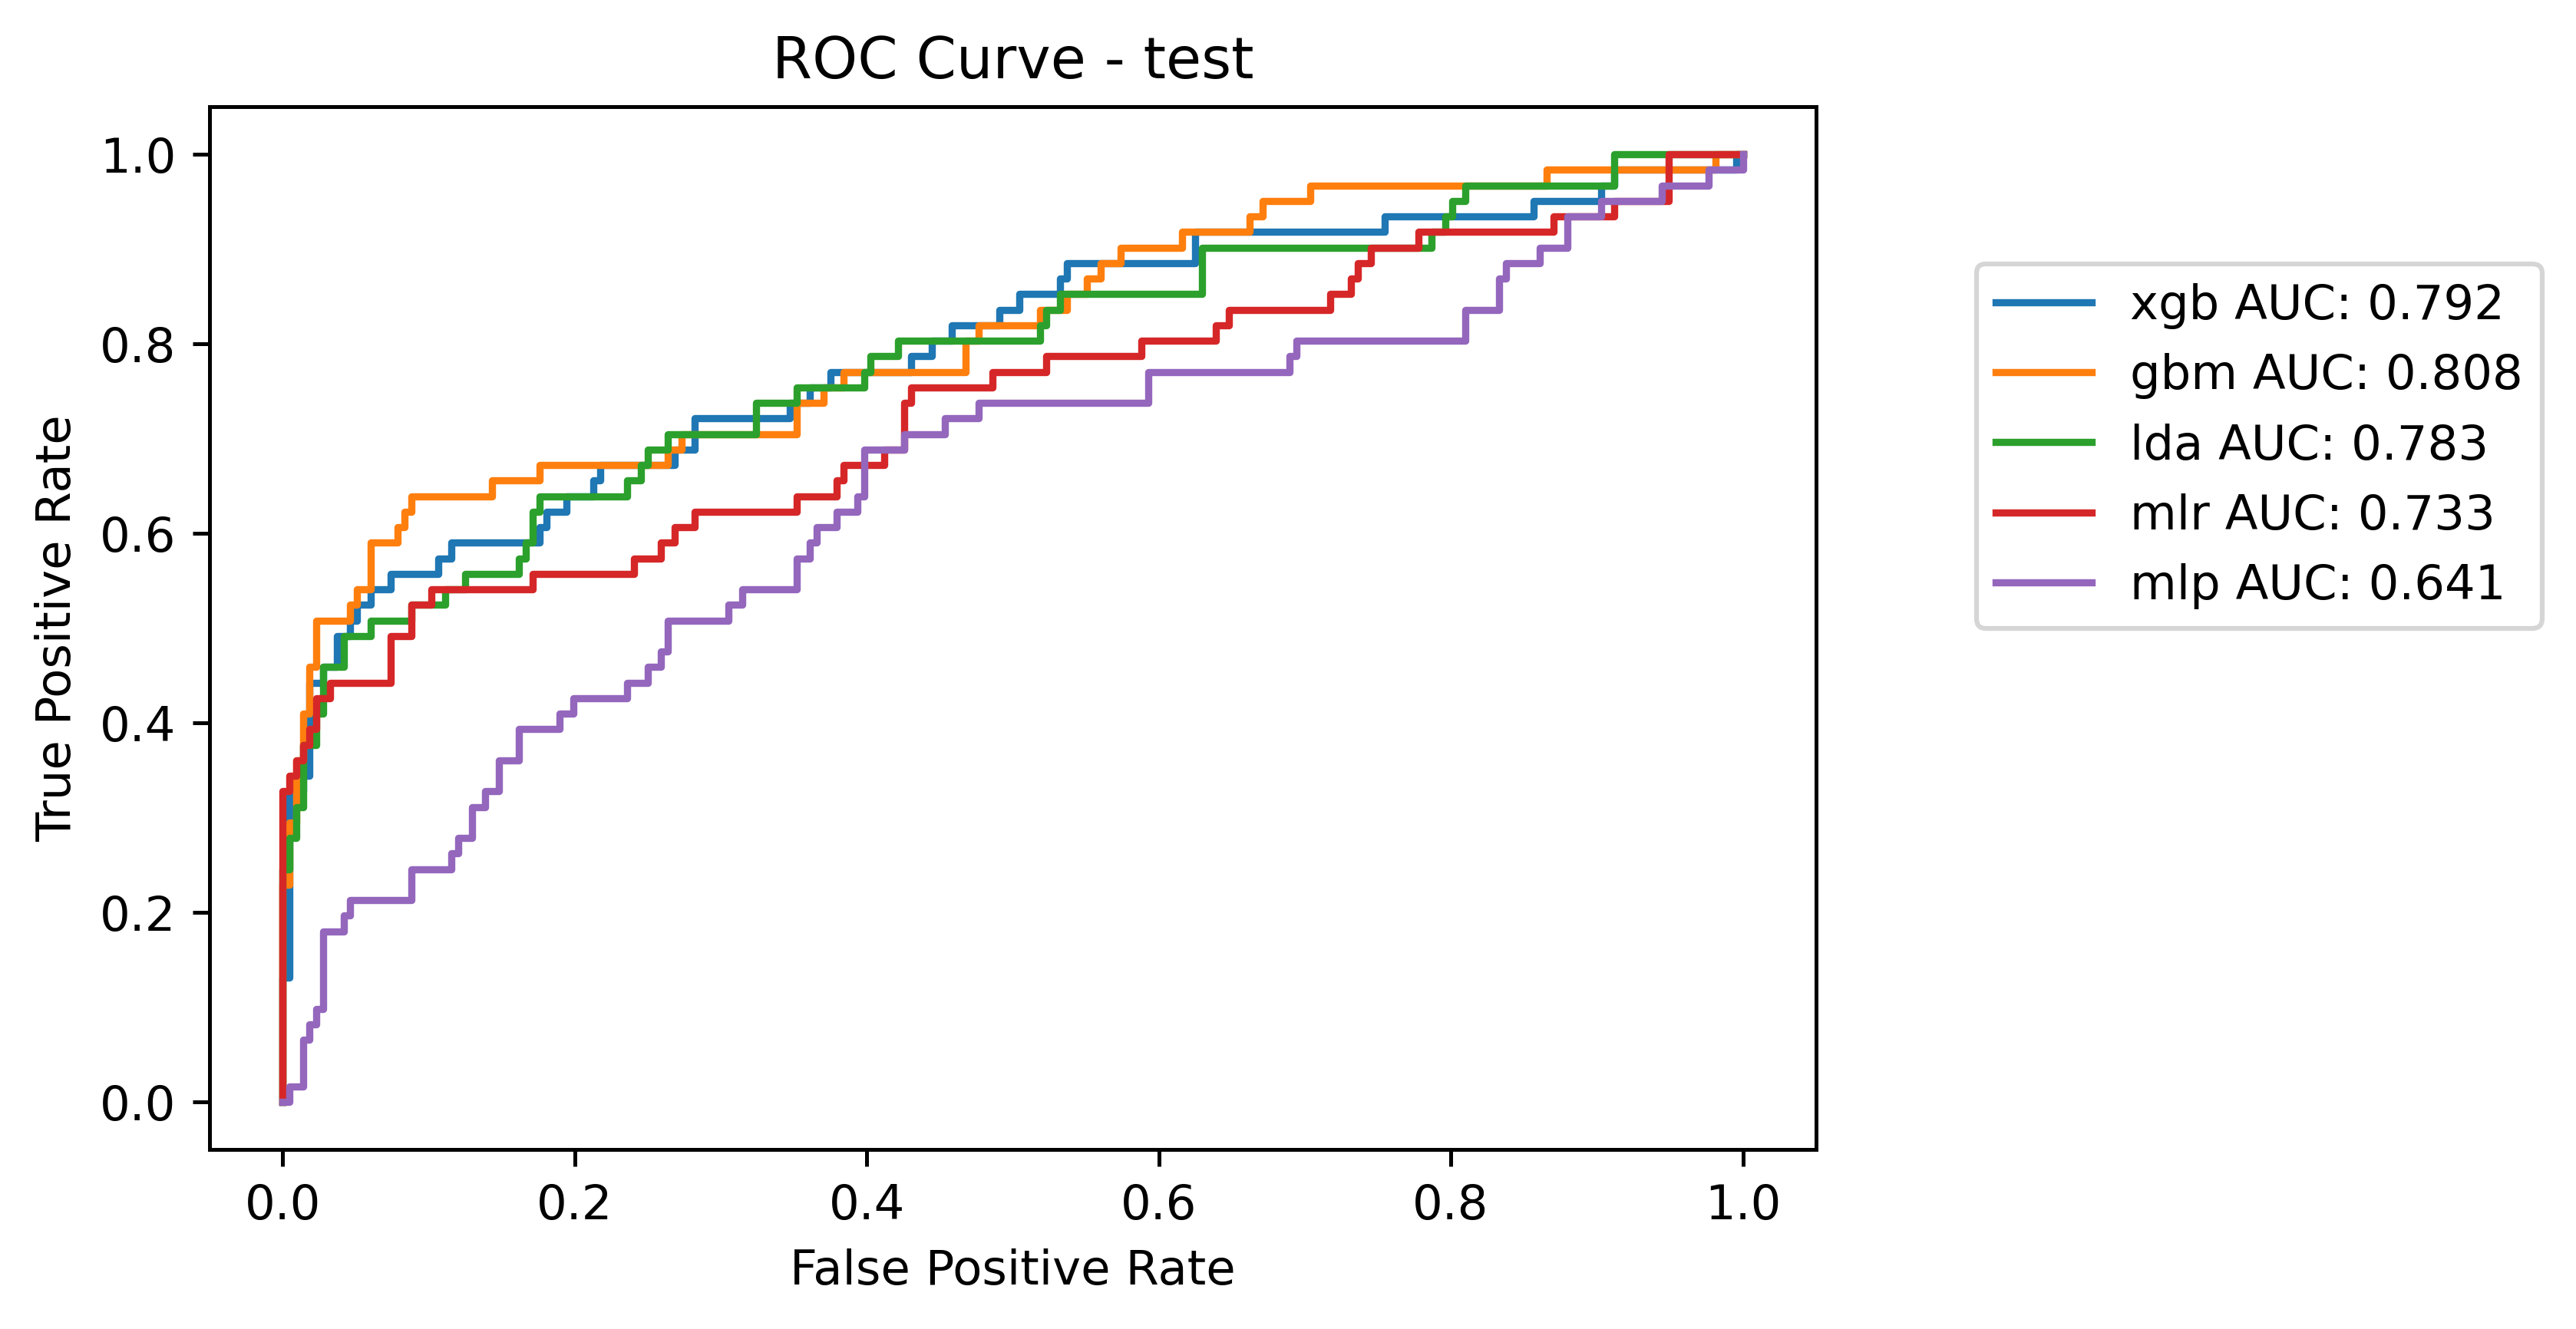

In [24]:
    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(xgb_fpr_last_test, xgb_tpr_last_test, label="xgb AUC: "+str(round(xgb_auc_last_test,3)))
    plt.plot(gbm_fpr_last_test, gbm_tpr_last_test, label="gbm AUC: "+str(round(gbm_auc_last_test,3)))
    plt.plot(lda_fpr_last_test, lda_tpr_last_test, label="lda AUC: "+str(round(lda_auc_last_test,3)))
    plt.plot(mlr_fpr_last_test, mlr_tpr_last_test, label="mlr AUC: "+str(round(mlr_auc_last_test,3)))
    plt.plot(mlp_fpr_last_test, mlp_tpr_last_test, label="mlp AUC: "+str(round(mlp_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - test')
    plt.legend(loc = (1.1,0.5))
    plt.show()

疊圖AUPRC-TEST

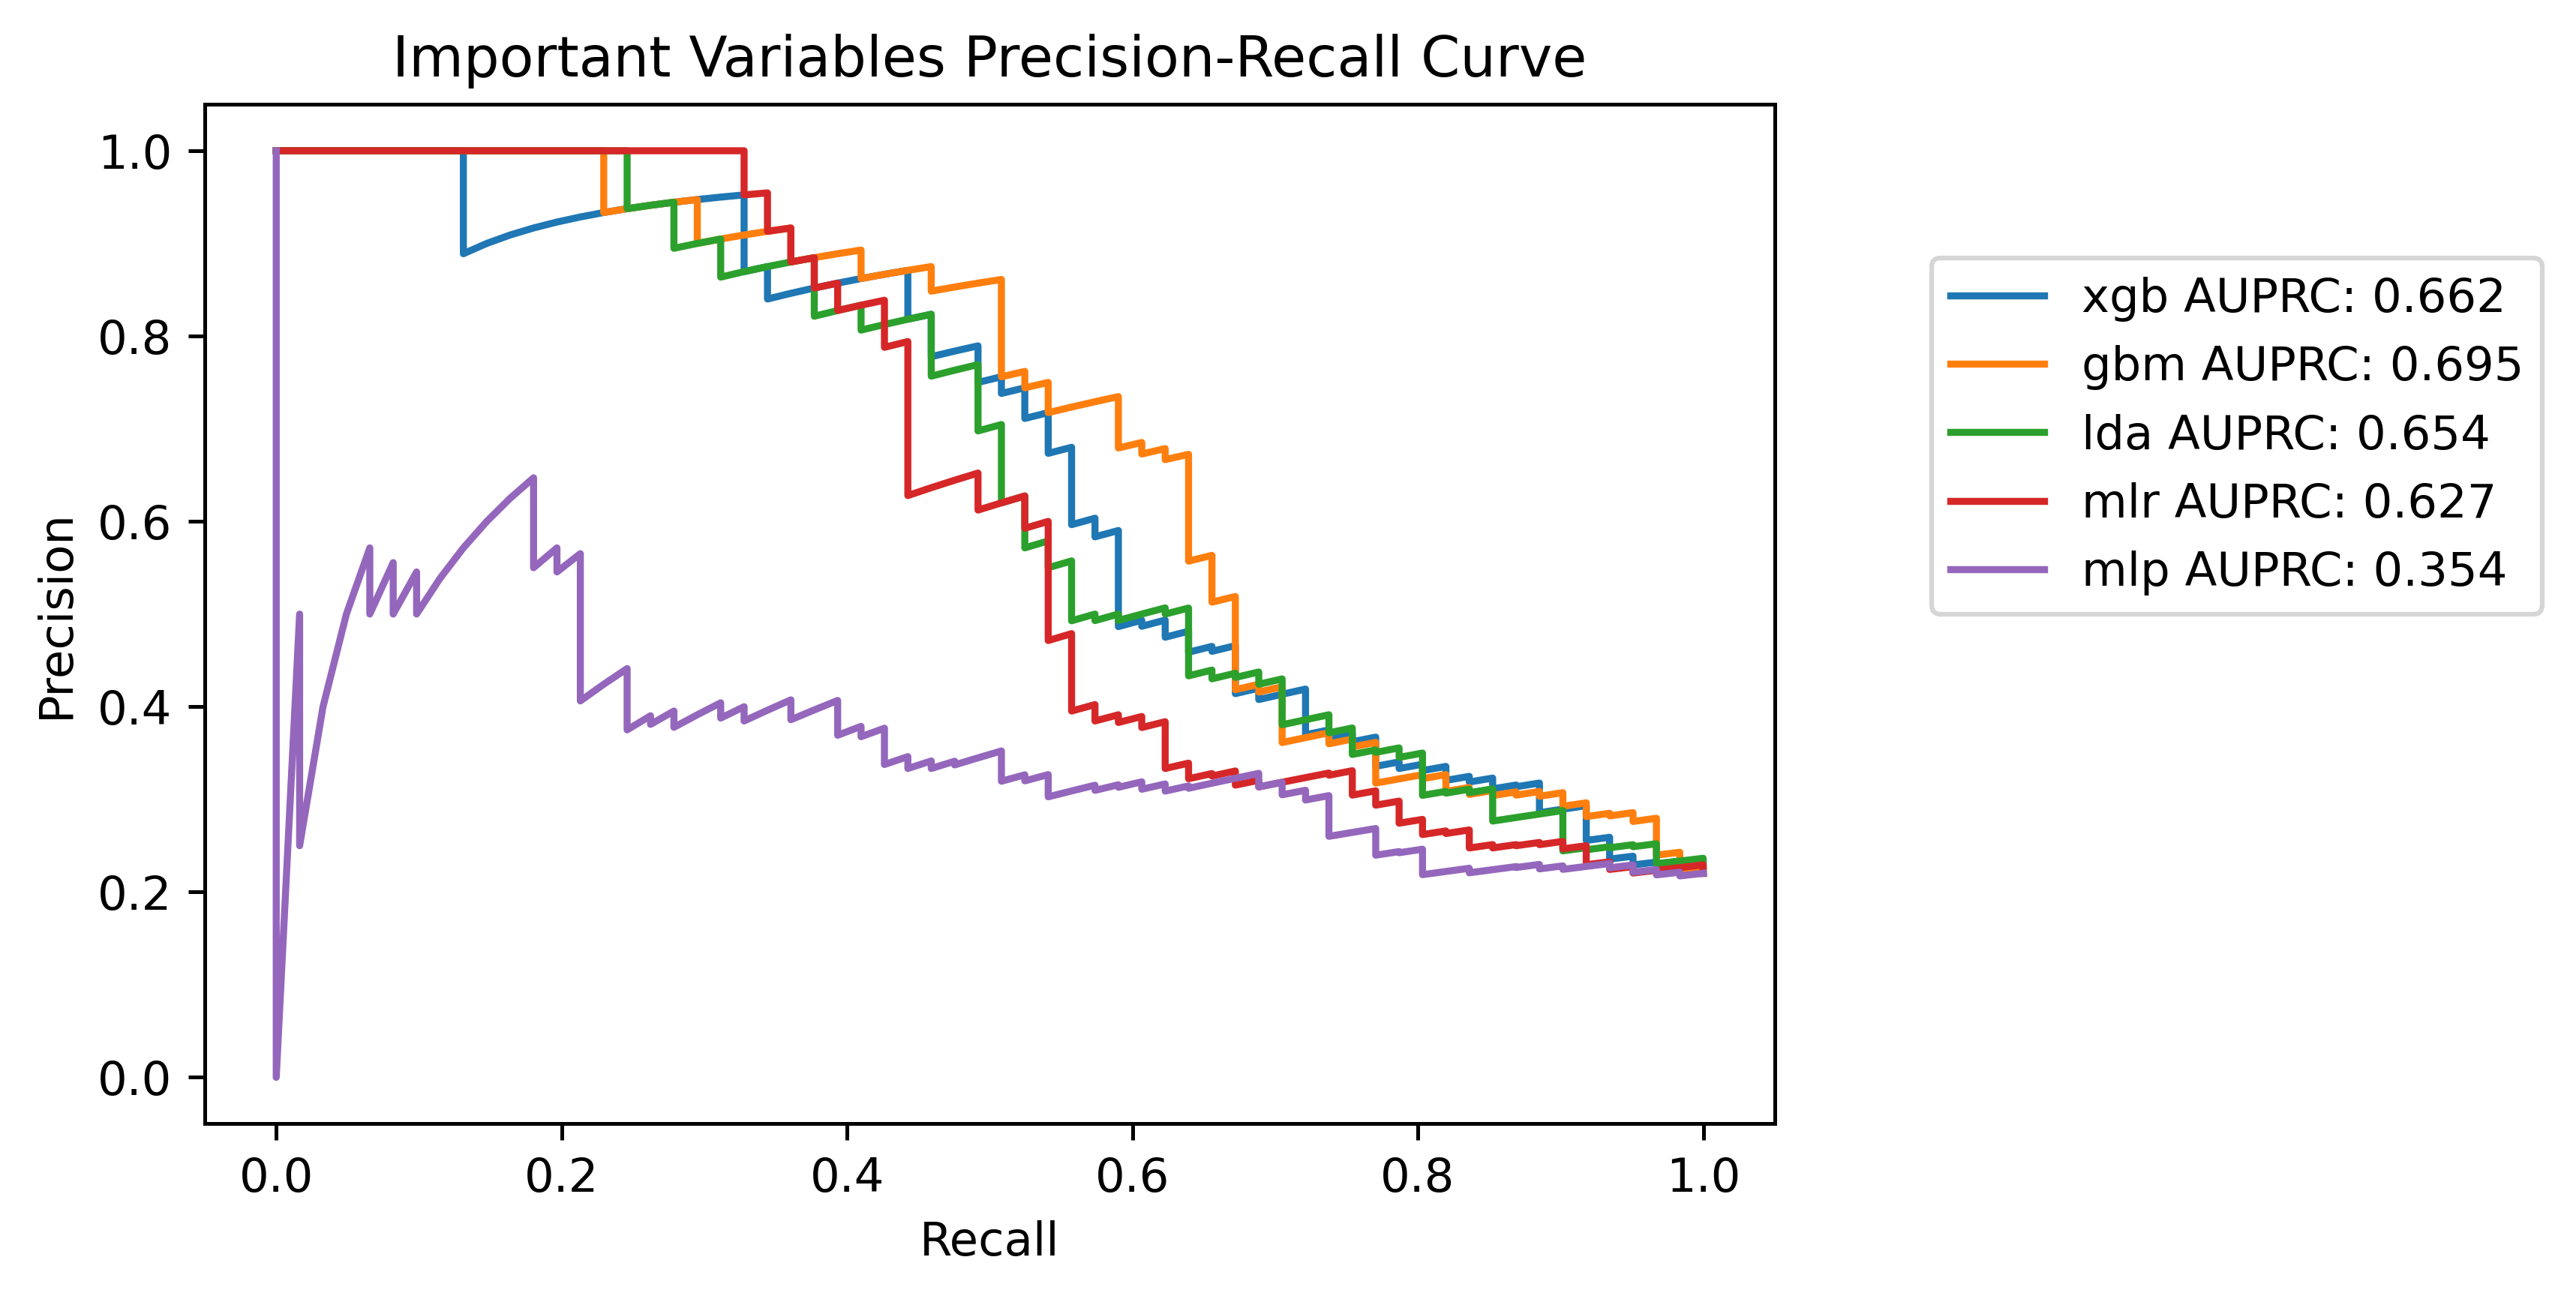

In [25]:
    # 繪製P-R曲線
    plt.figure(dpi=450)
    plt.plot(xgb_recall_last, xgb_precision_last, label="xgb AUPRC: "+str(round(xgb_auprc_last,3)))
    plt.plot(gbm_recall_last, gbm_precision_last, label="gbm AUPRC: "+str(round(gbm_auprc_last,3)))
    plt.plot(lda_recall_last, lda_precision_last, label="lda AUPRC: "+str(round(lda_auprc_last,3)))
    plt.plot(mlr_recall_last, mlr_precision_last, label="mlr AUPRC: "+str(round(mlr_auprc_last,3)))
    plt.plot(mlp_recall_last, mlp_precision_last, label="mlp AUPRC: "+str(round(mlp_auprc_last,3)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Important Variables Precision-Recall Curve')

    plt.legend(loc = (1.1,0.5))
    plt.show()

疊圖 train - test - xgb

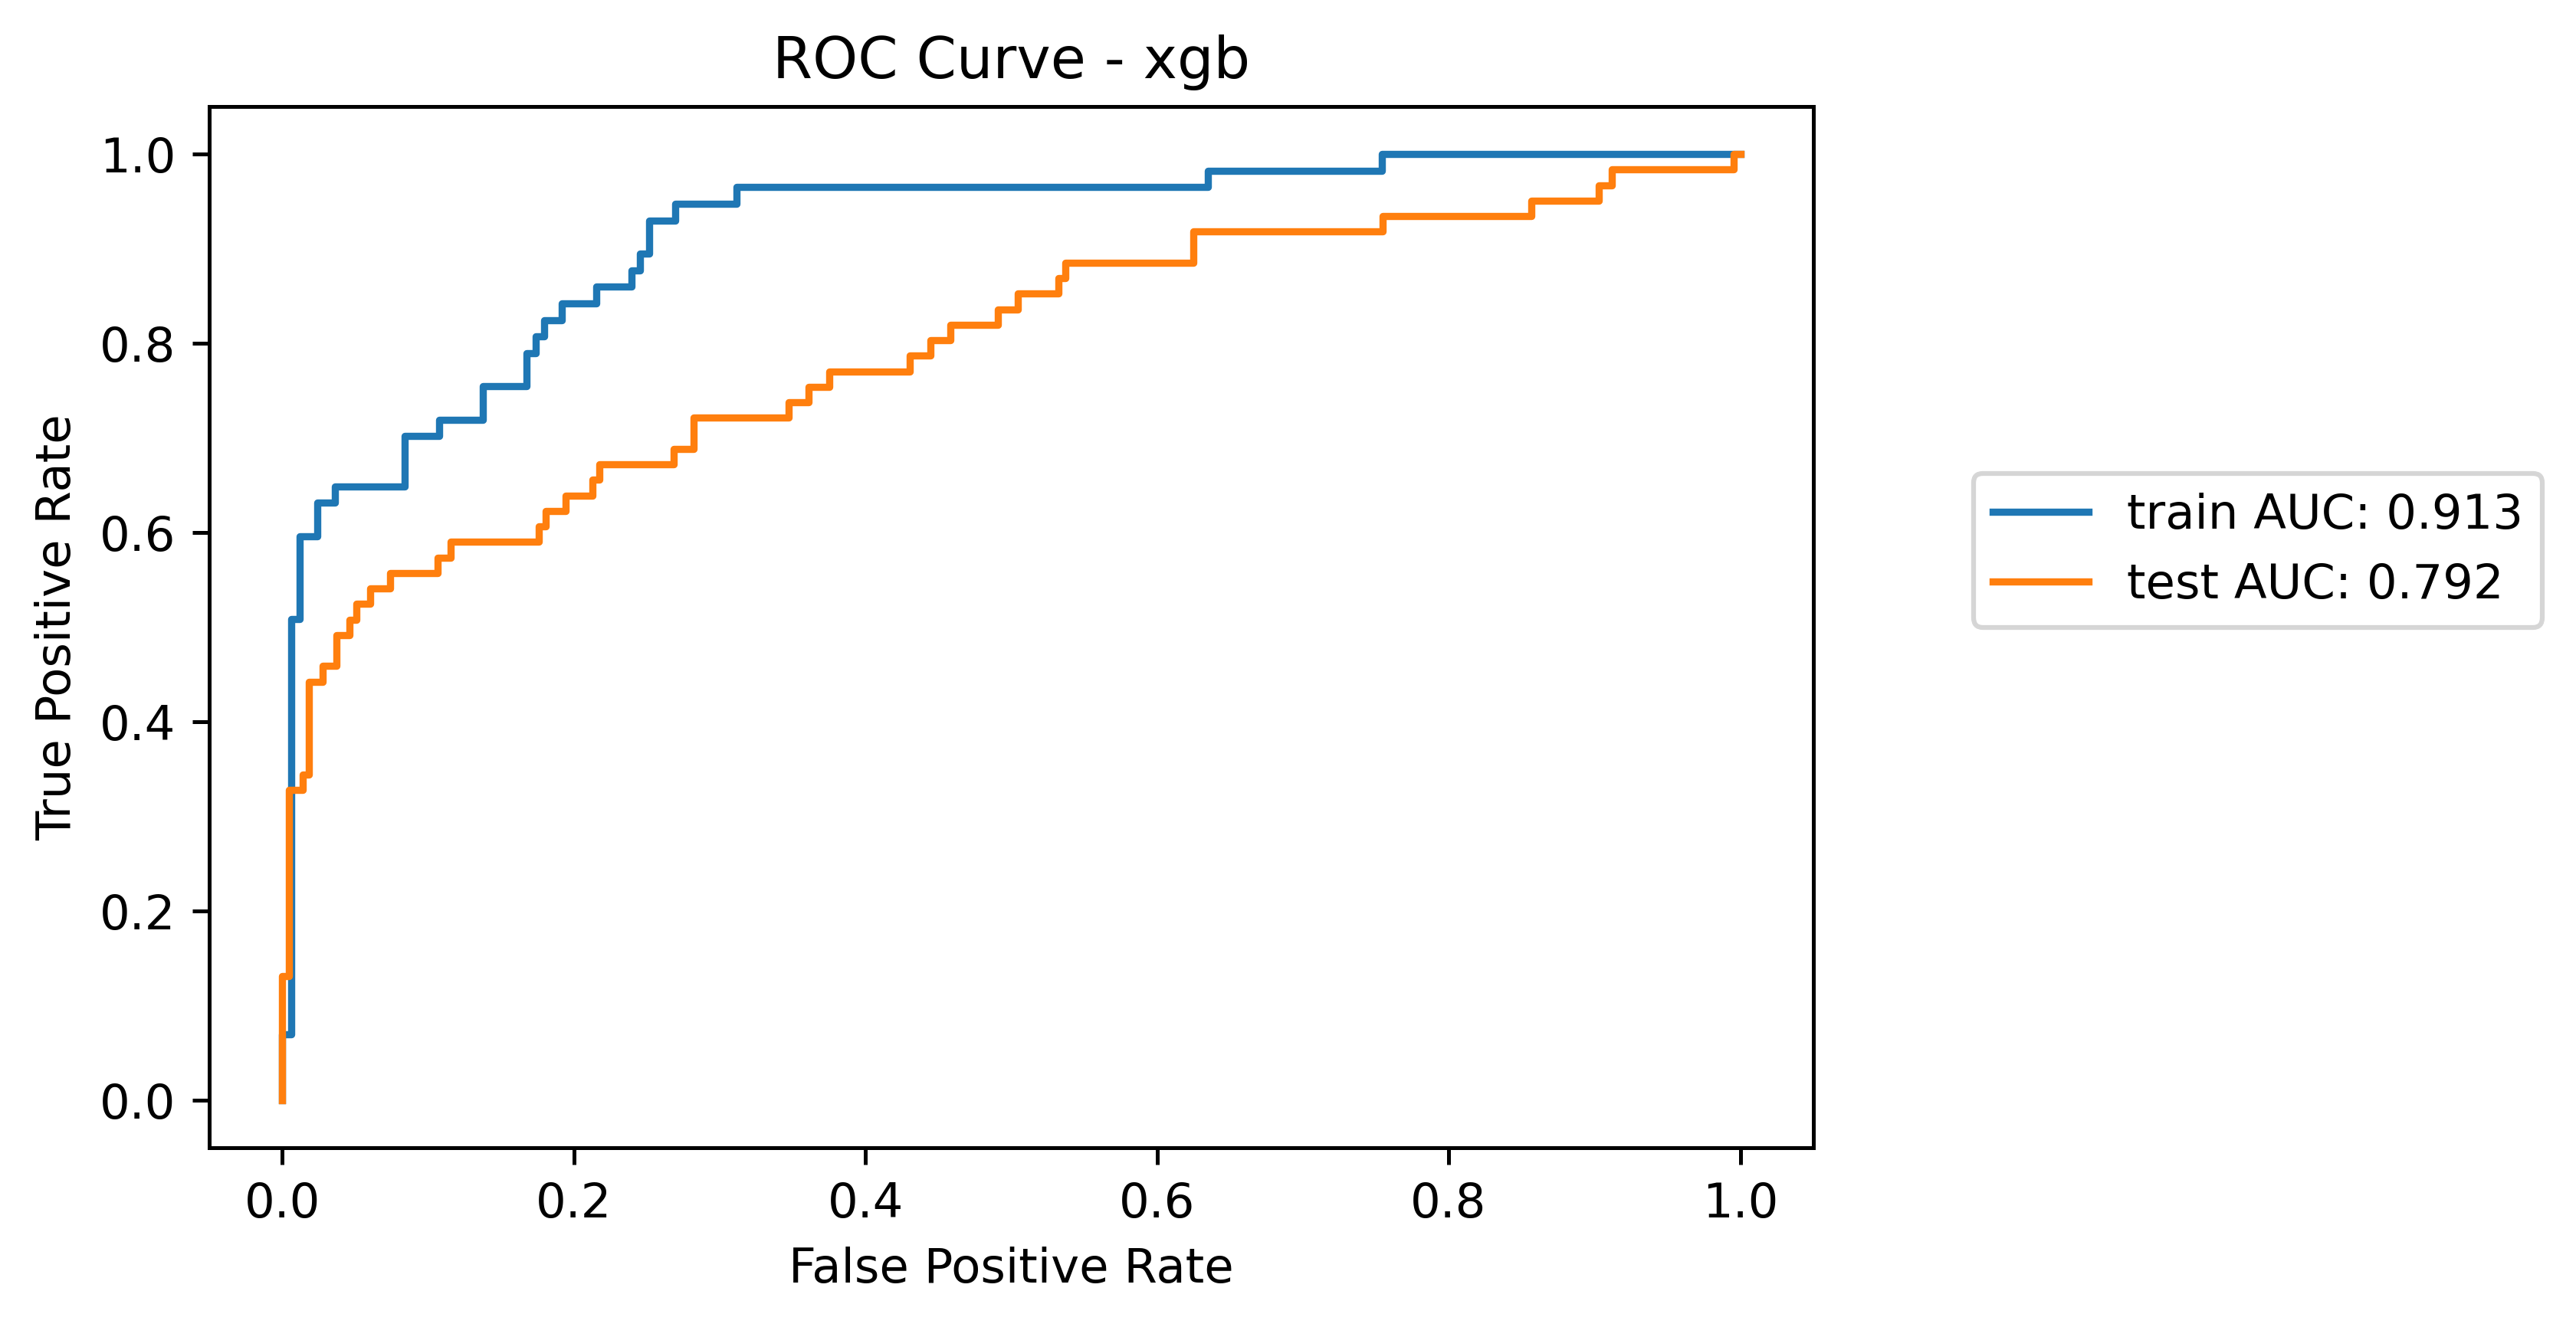

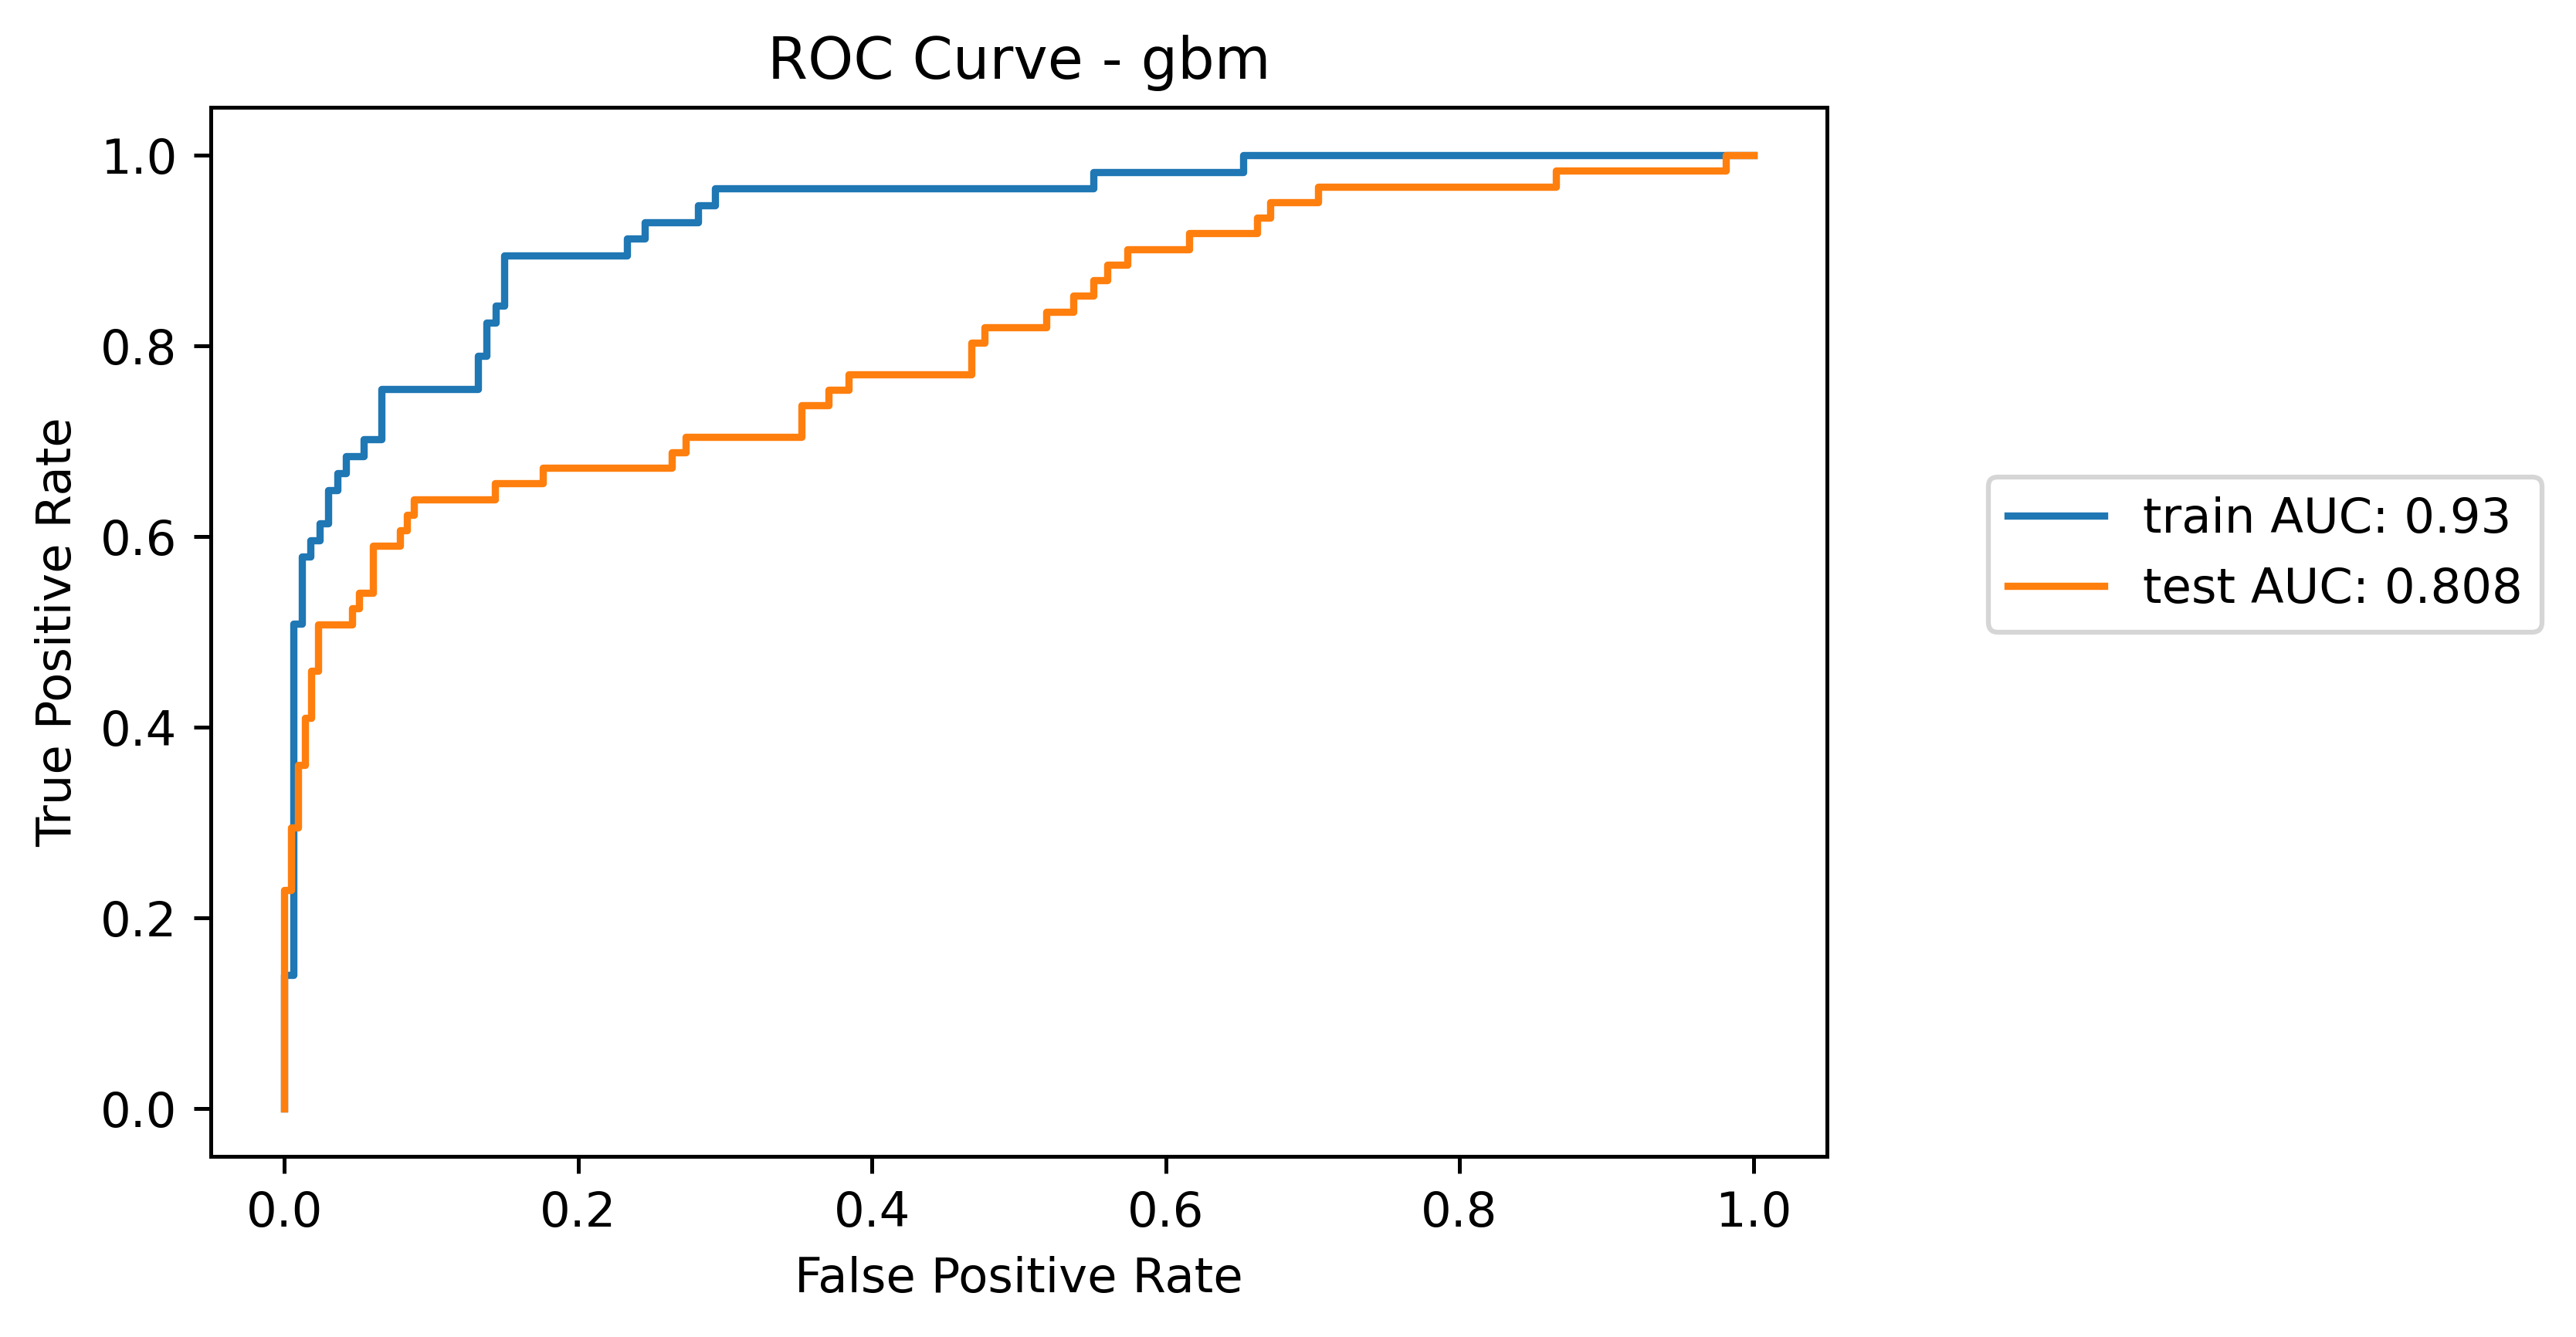

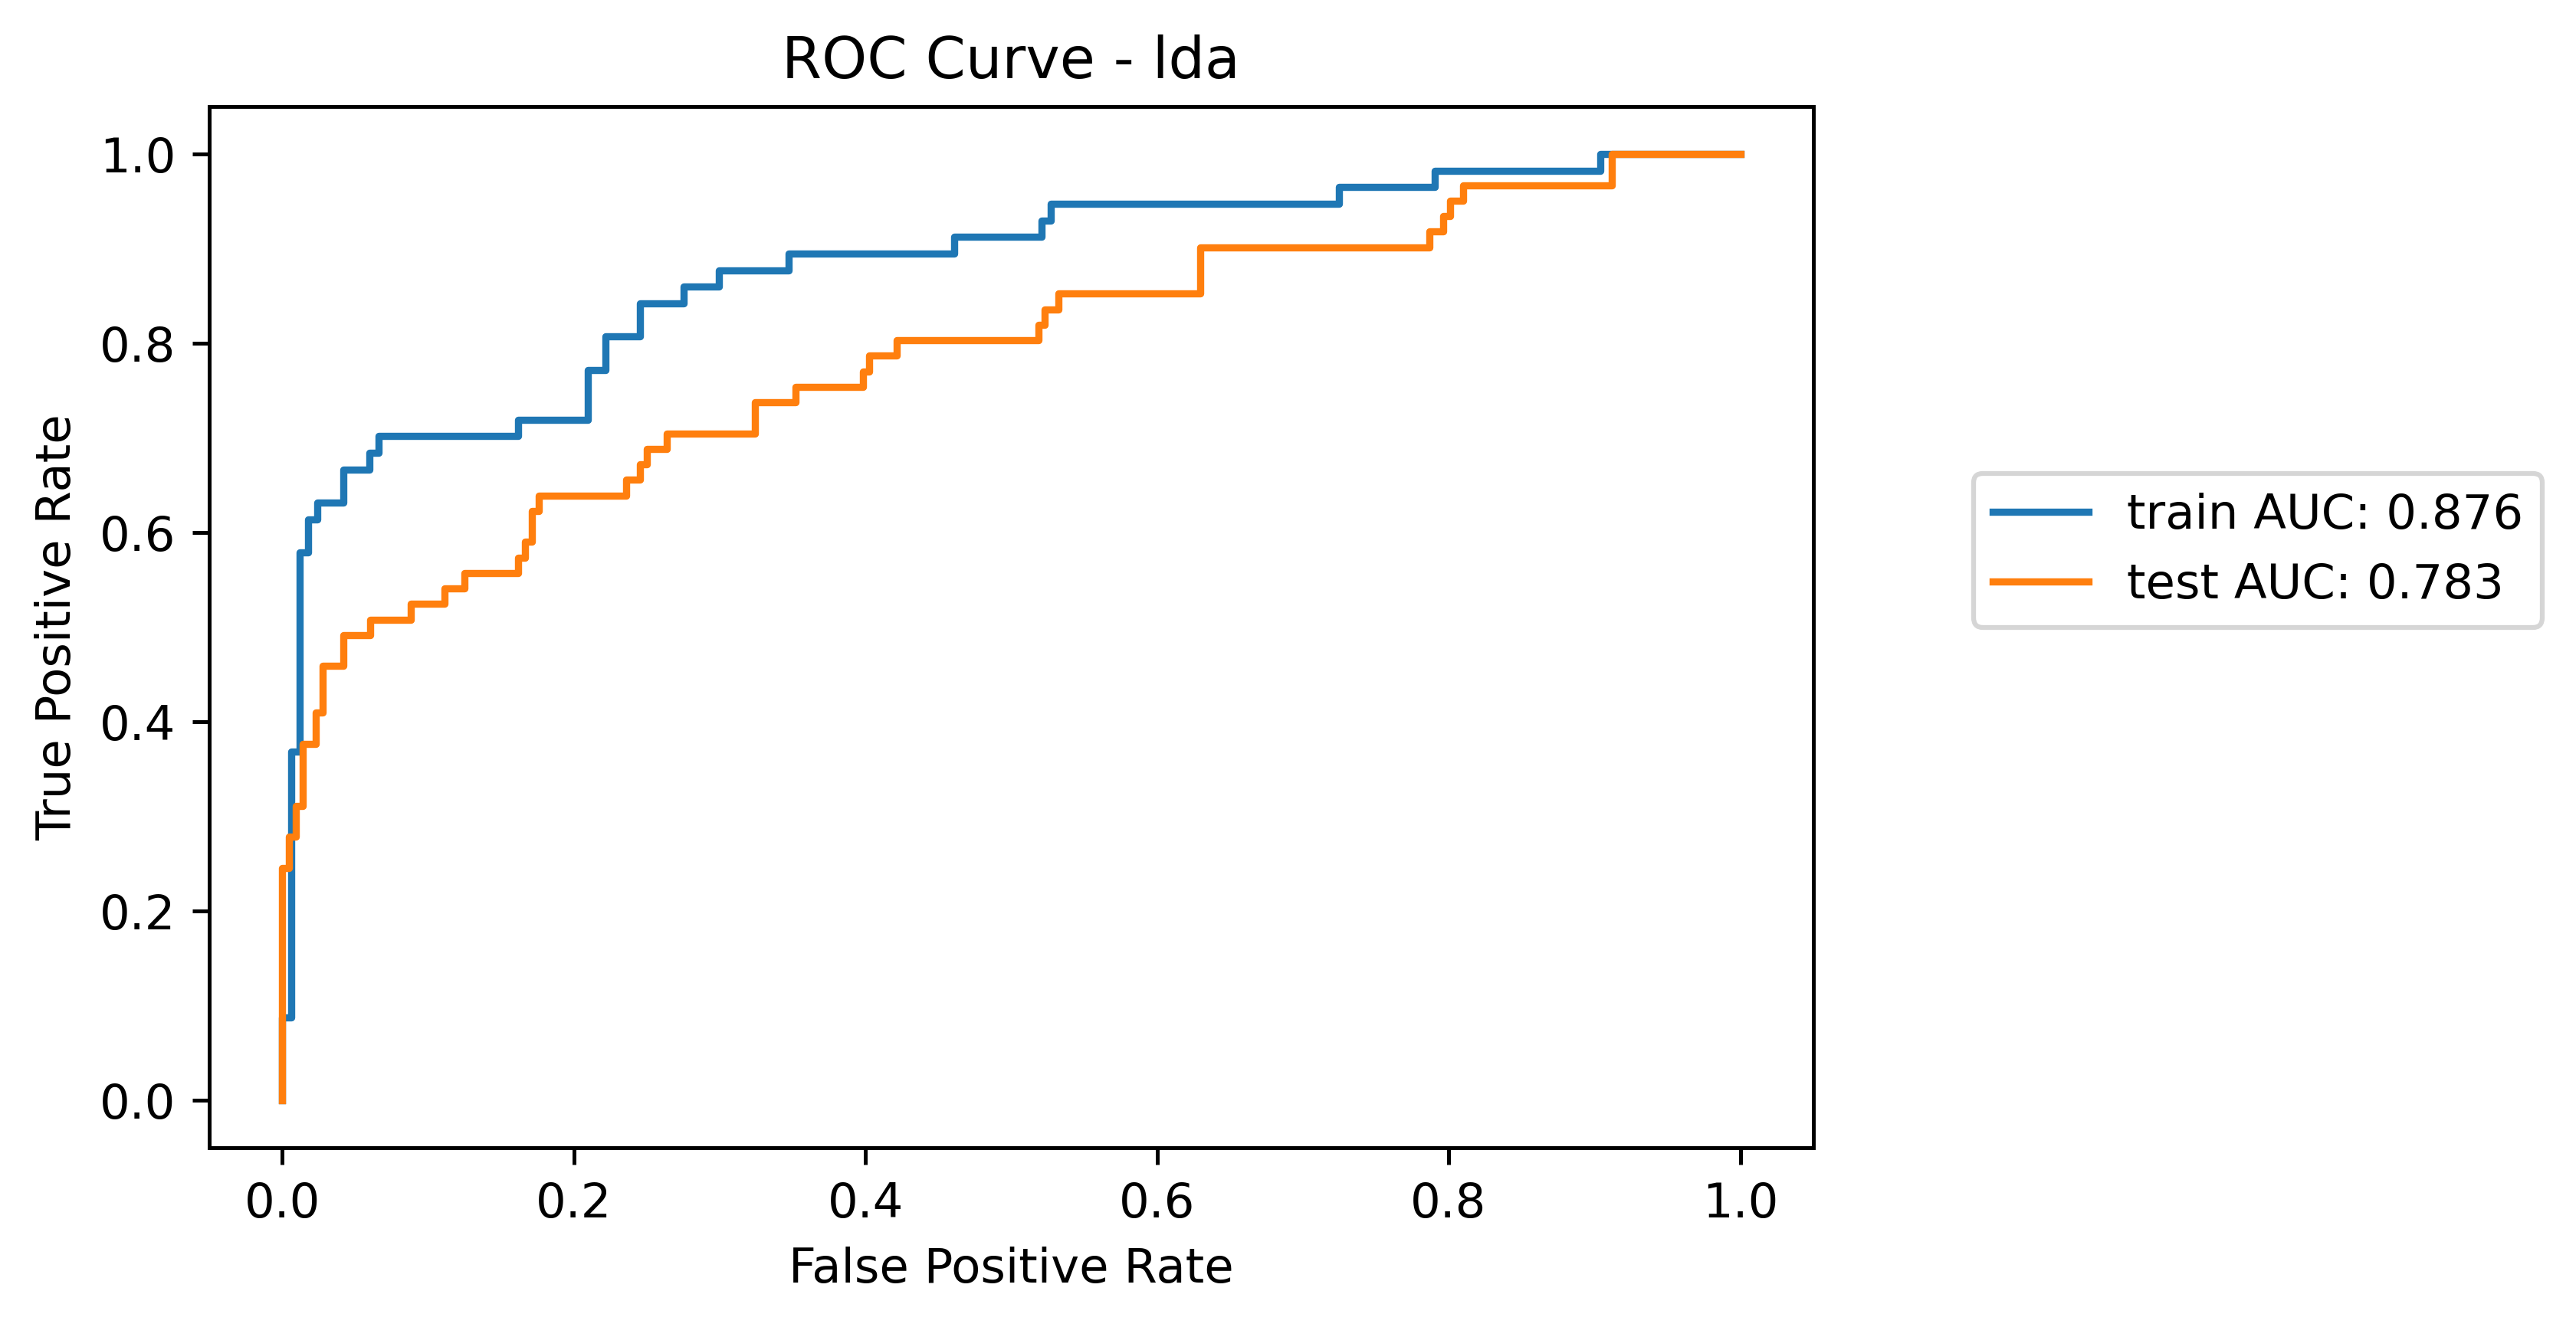

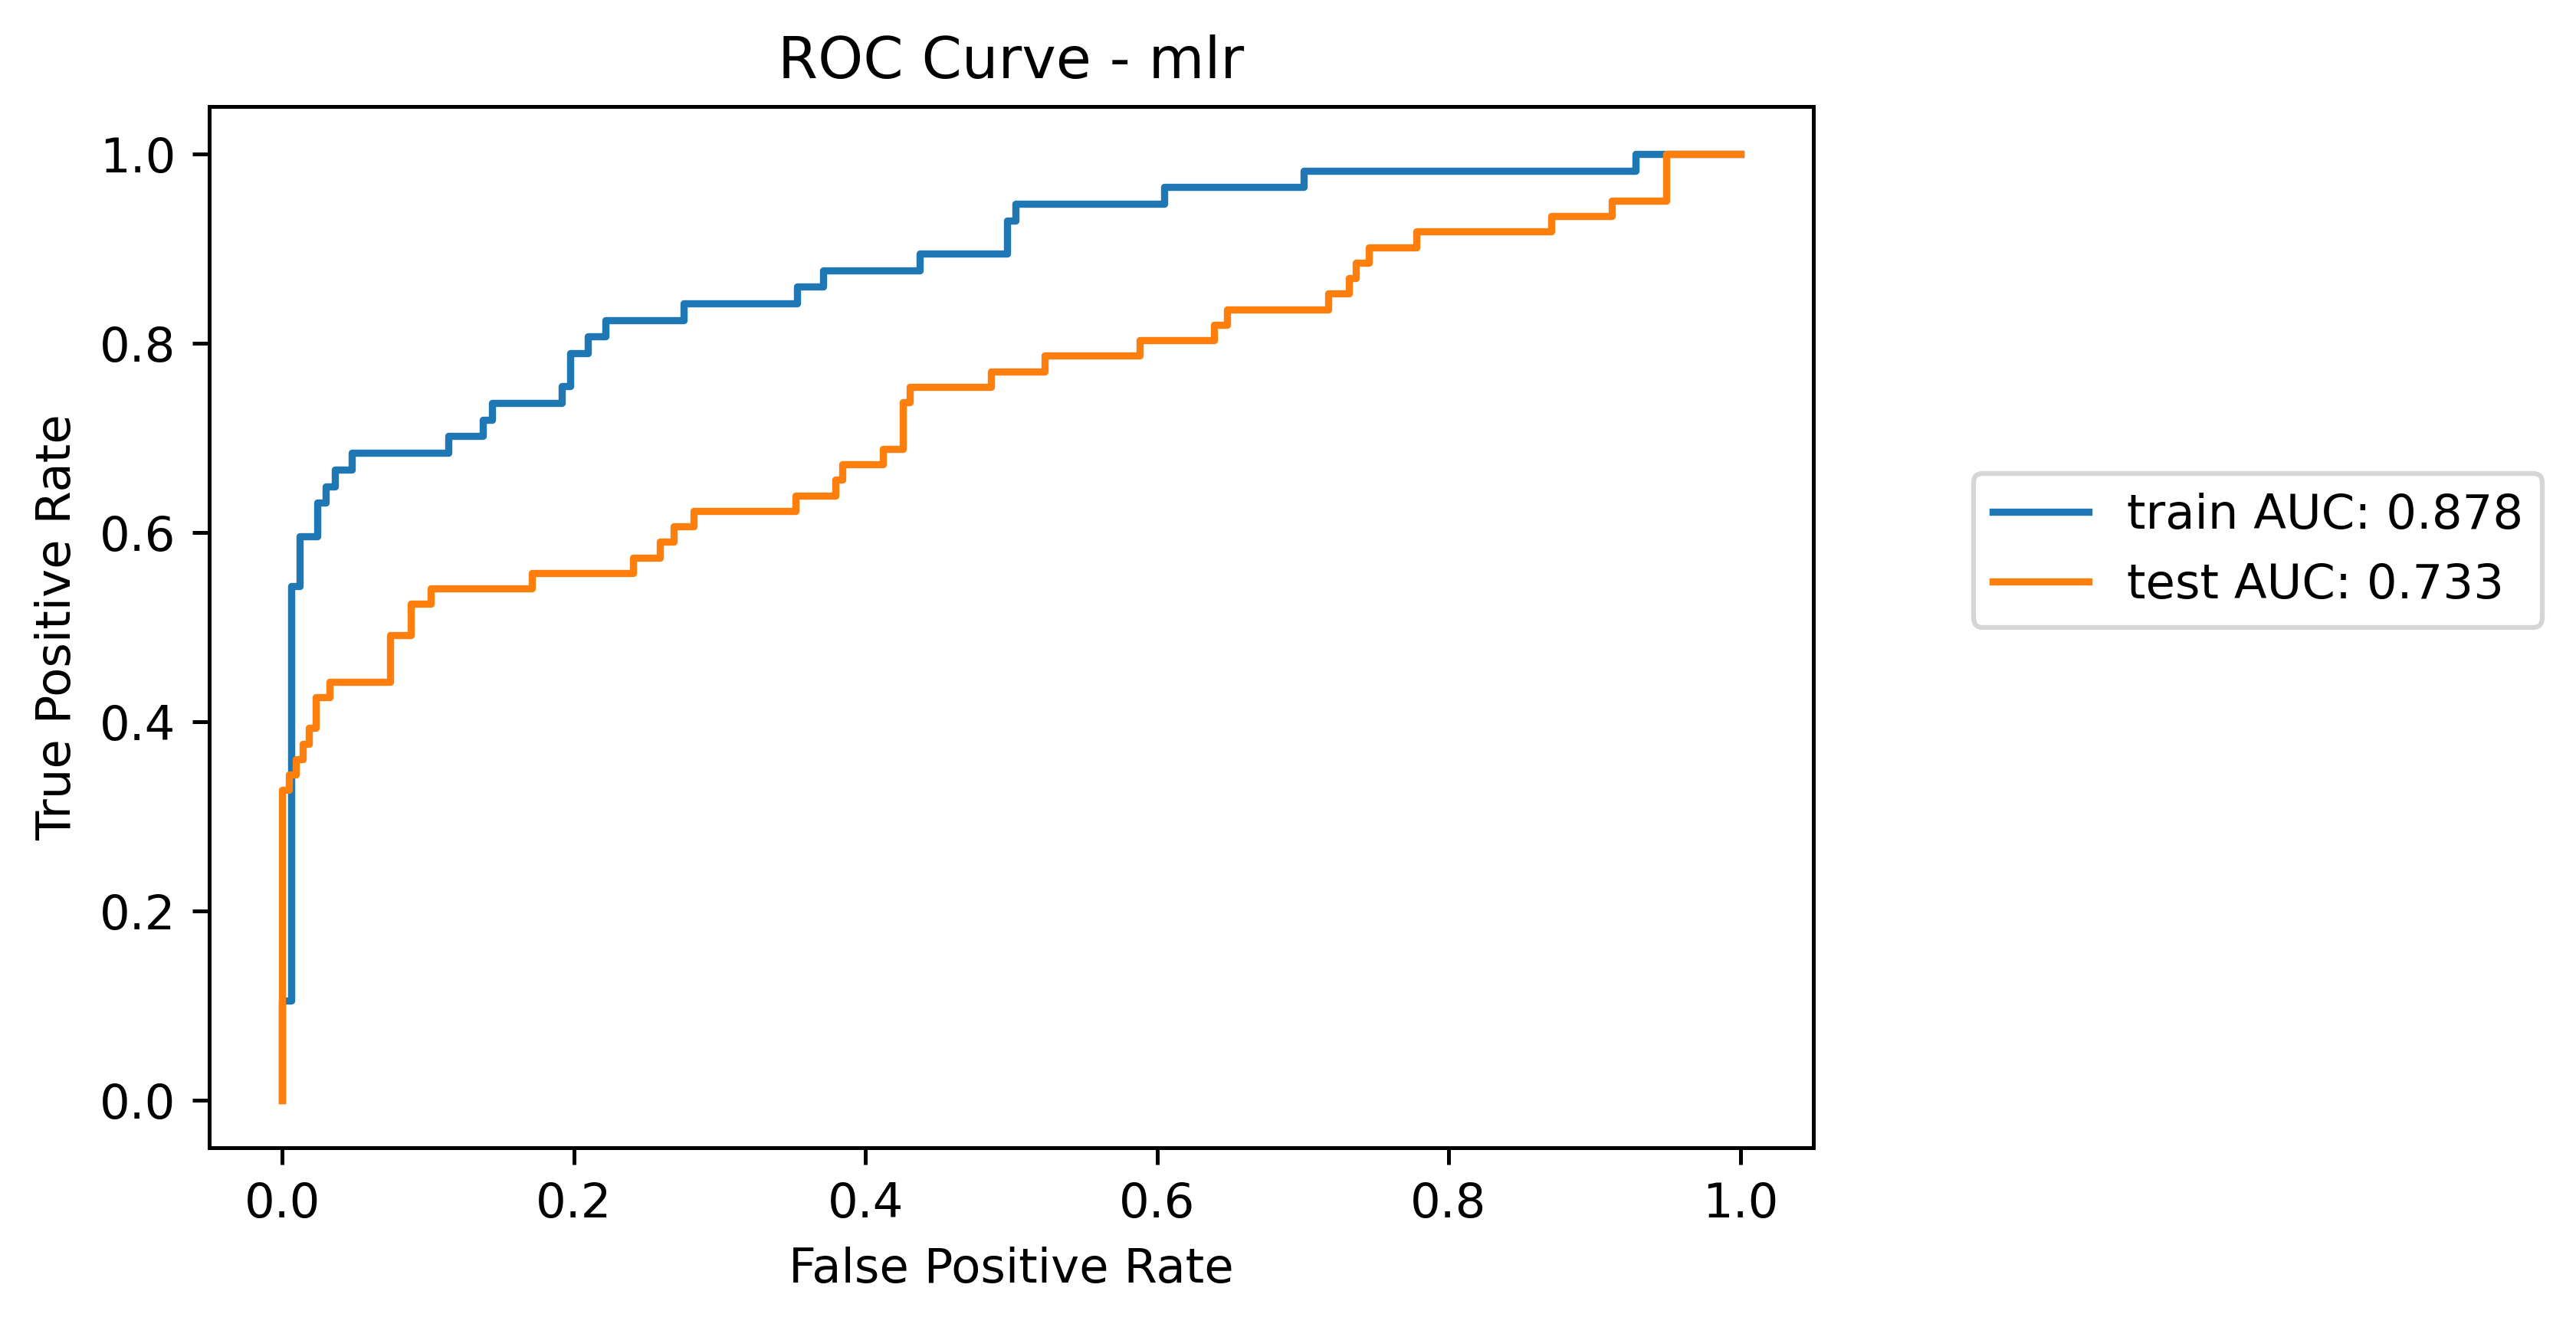

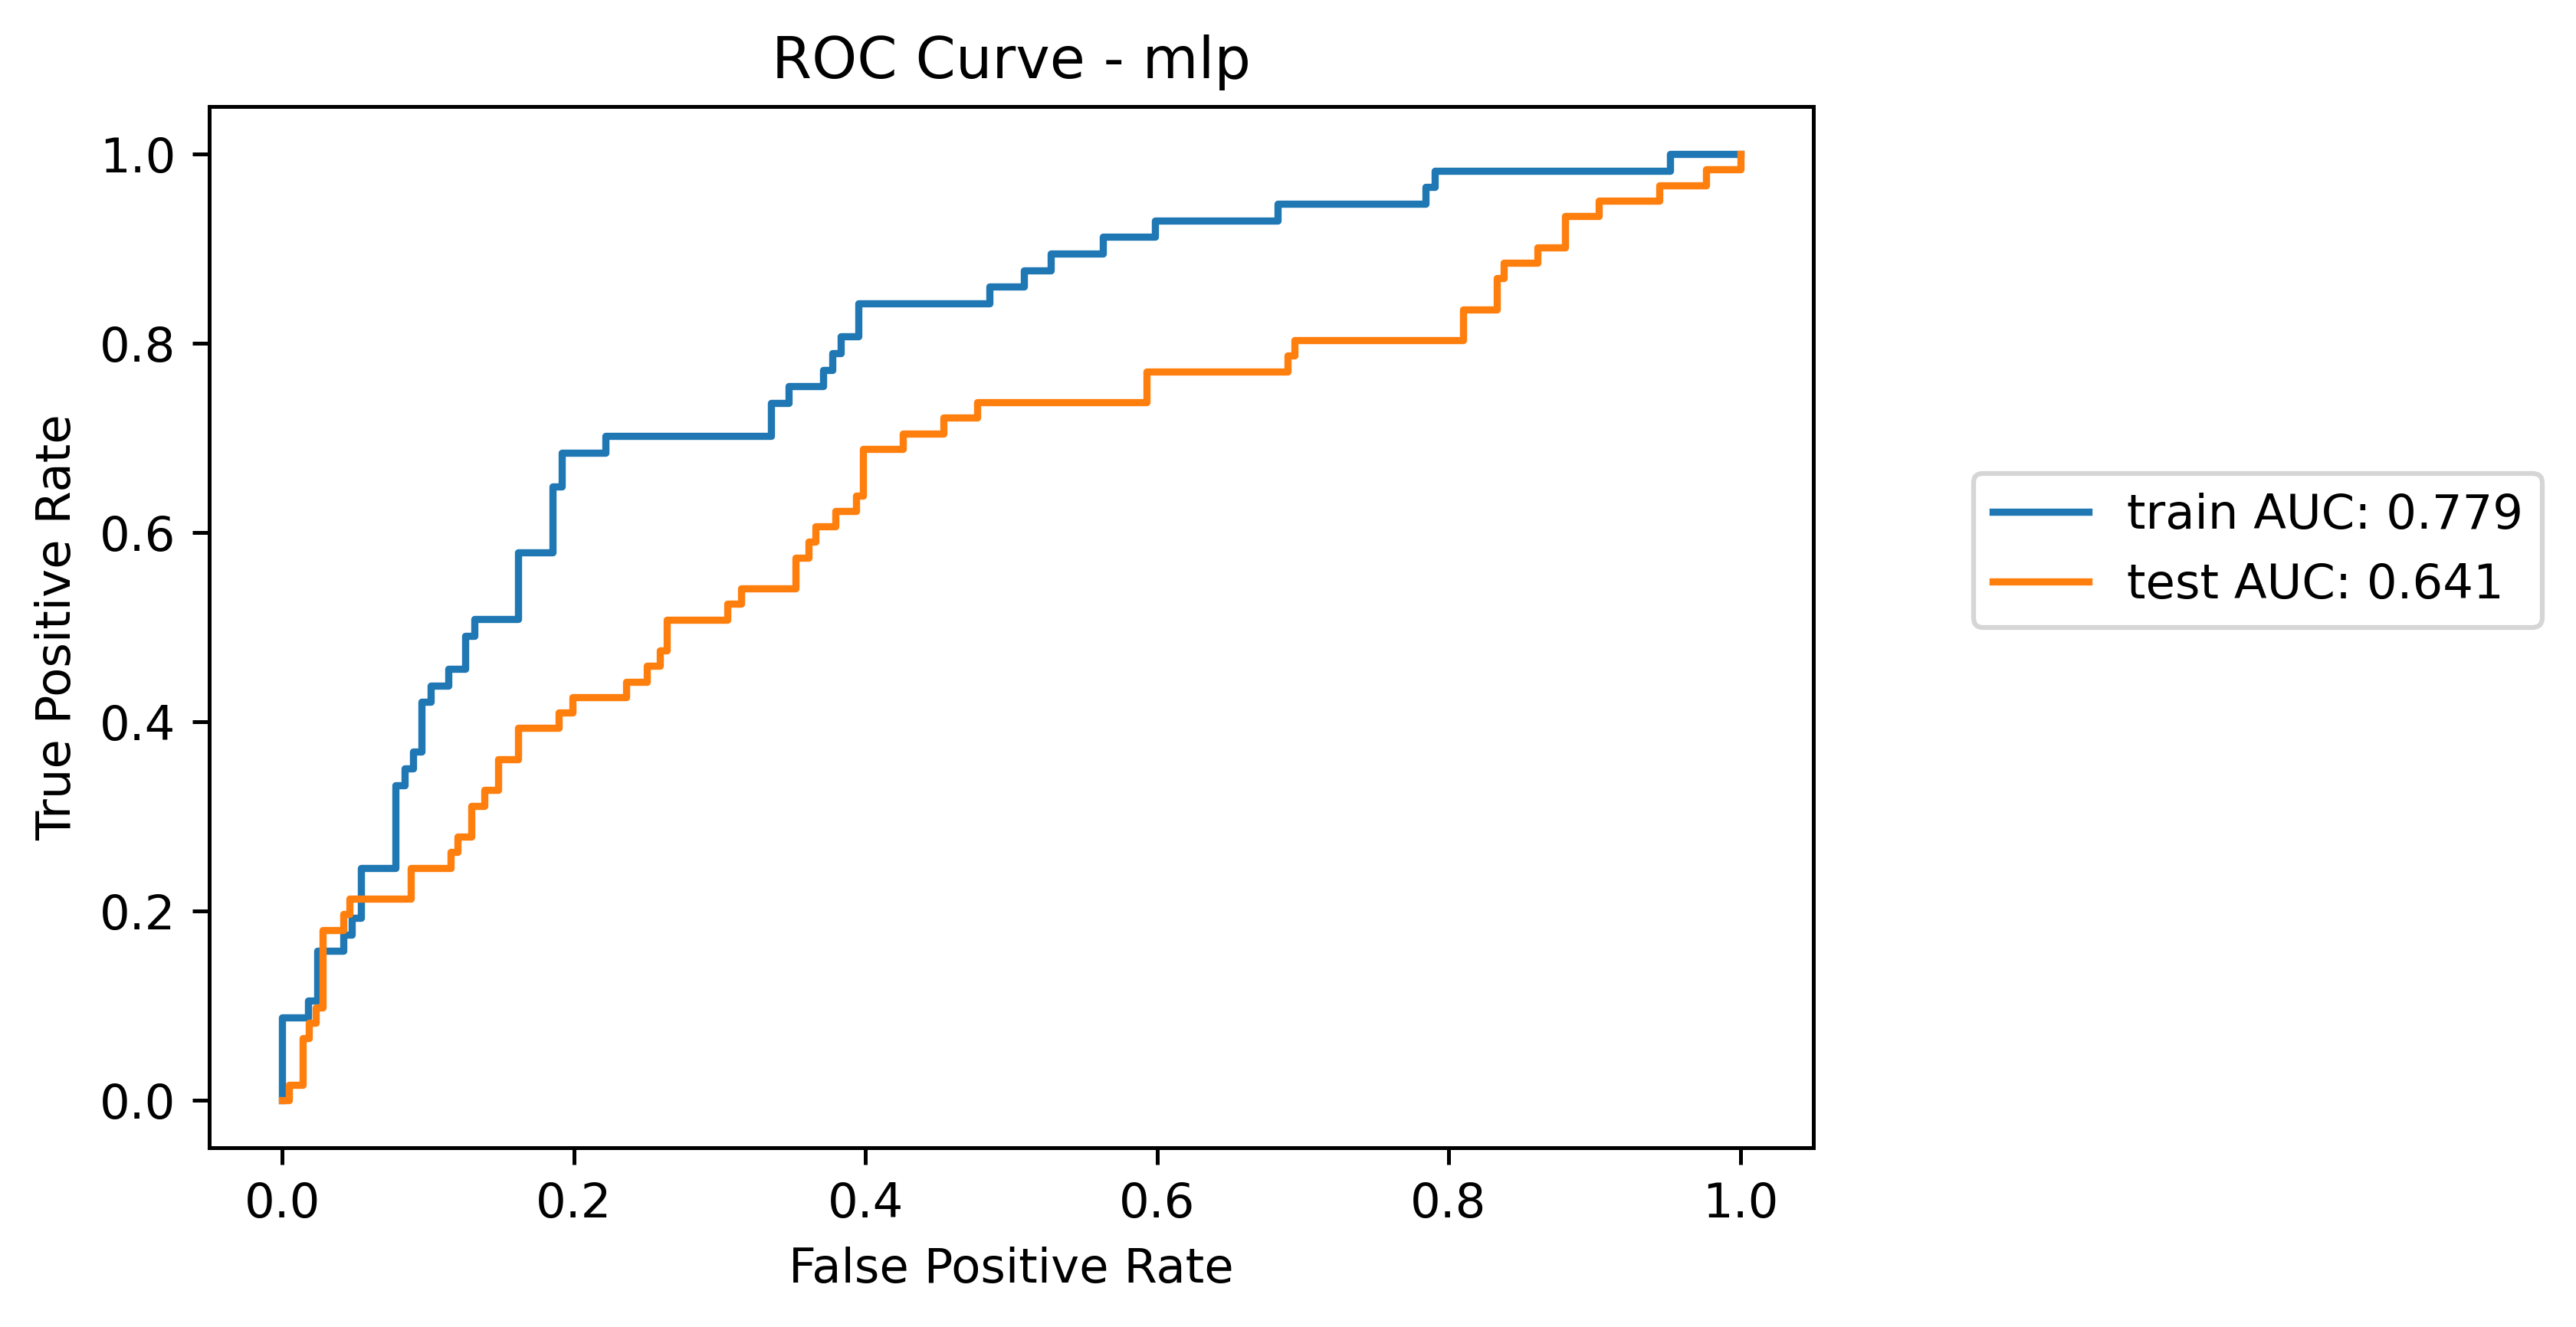

In [26]:
    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(xgb_fpr_test, xgb_tpr_test, label="train AUC: "+str(round(xgb_auc_test,3)))
    plt.plot(xgb_fpr_last_test, xgb_tpr_last_test, label="test AUC: "+str(round(xgb_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - xgb')
    plt.legend(loc = (1.1,0.5))
    plt.show()

    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(gbm_fpr_test, gbm_tpr_test, label="train AUC: "+str(round(gbm_auc_test,3)))
    plt.plot(gbm_fpr_last_test, gbm_tpr_last_test, label="test AUC: "+str(round(gbm_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - gbm')
    plt.legend(loc = (1.1,0.5))
    plt.show()

    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(lda_fpr_test, lda_tpr_test, label="train AUC: "+str(round(lda_auc_test,3)))
    plt.plot(lda_fpr_last_test, lda_tpr_last_test, label="test AUC: "+str(round(lda_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - lda')
    plt.legend(loc = (1.1,0.5))
    plt.show()

    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(mlr_fpr_test, mlr_tpr_test, label="train AUC: "+str(round(mlr_auc_test,3)))
    plt.plot(mlr_fpr_last_test, mlr_tpr_last_test, label="test AUC: "+str(round(mlr_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - mlr')
    plt.legend(loc = (1.1,0.5))
    plt.show()

    # 繪製ROC曲線
    plt.figure(dpi=450)
    plt.plot(mlp_fpr_test, mlp_tpr_test, label="train AUC: "+str(round(mlp_auc_test,3)))
    plt.plot(mlp_fpr_last_test, mlp_tpr_last_test, label="test AUC: "+str(round(mlp_auc_last_test,3)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - mlp')
    plt.legend(loc = (1.1,0.5))
    plt.show()